In [2]:
import pdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_parallelise as u_par
import datetime
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import shapely.geometry as shpg
import glob
import pickle as pkl
import os
import multiprocessing
import ipdb
from metpy import calc
from metpy.units import units
from endgame import hist2d


pylab.rcParams['figure.figsize'] = (25., 25.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
basefiles = cnst.network_data+ 'data/LMCS/CP4_study_saves/'

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.


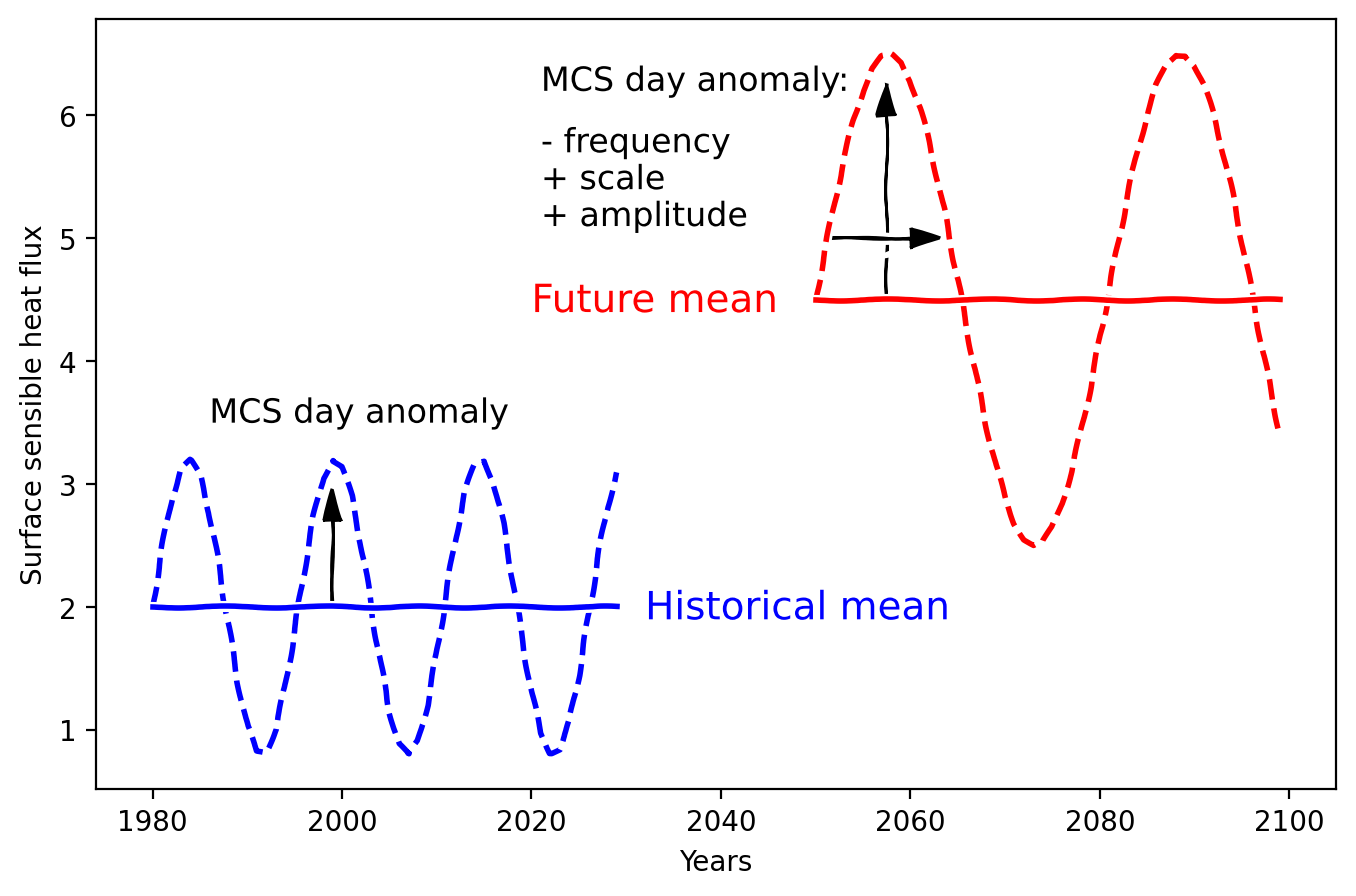

In [145]:
f = plt.figure(figsize=(8,5), dpi=200)
ax = f.add_subplot(111)
with plt.xkcd():  # Yes...
    plt.plot(np.arange(1980,2030), np.sin(2*np.linspace(0, 10))*1.2+2, color='blue', linestyle='dashed')
    plt.plot(np.arange(1980,2030), [2]*50, color='blue')
    plt.plot(np.arange(2050,2100), np.sin(np.linspace(0, 10))*2+4.5, color='red', linestyle='dashed')
    plt.plot(np.arange(2050,2100), [4.5]*50, color='red')
    plt.text(2032, 1.9, 'Historical mean', color='blue')
    plt.text(2020, 4.4, 'Future mean', color='red')
    plt.xlabel('Years')
    plt.ylabel('Surface sensible heat flux')
    ax.arrow(1999, 2, 0, 0.7, head_width=2, head_length=0.25, fc='k', ec='k')
    plt.text(1986, 3.5, 'MCS day anomaly', color='k', fontsize=12)#, rotation=45, rotation_mode='anchor', transform_rotates_text=True)

    ax.arrow(2057.5, 4.5, 0, 1.5, head_width=2, head_length=0.25, fc='k', ec='k')
    ax.arrow(2051, 5, 9, 0, head_width=0.17, head_length=3, fc='k', ec='k')

    plt.text(2021, 6.2, 'MCS day anomaly:', color='k', fontsize=12)
    plt.text(2021, 5.7, '- frequency', color='k', fontsize=12)
    plt.text(2021, 5.4, '+ scale', color='k', fontsize=12)
    plt.text(2021, 5.1, '+ amplitude', color='k', fontsize=12)


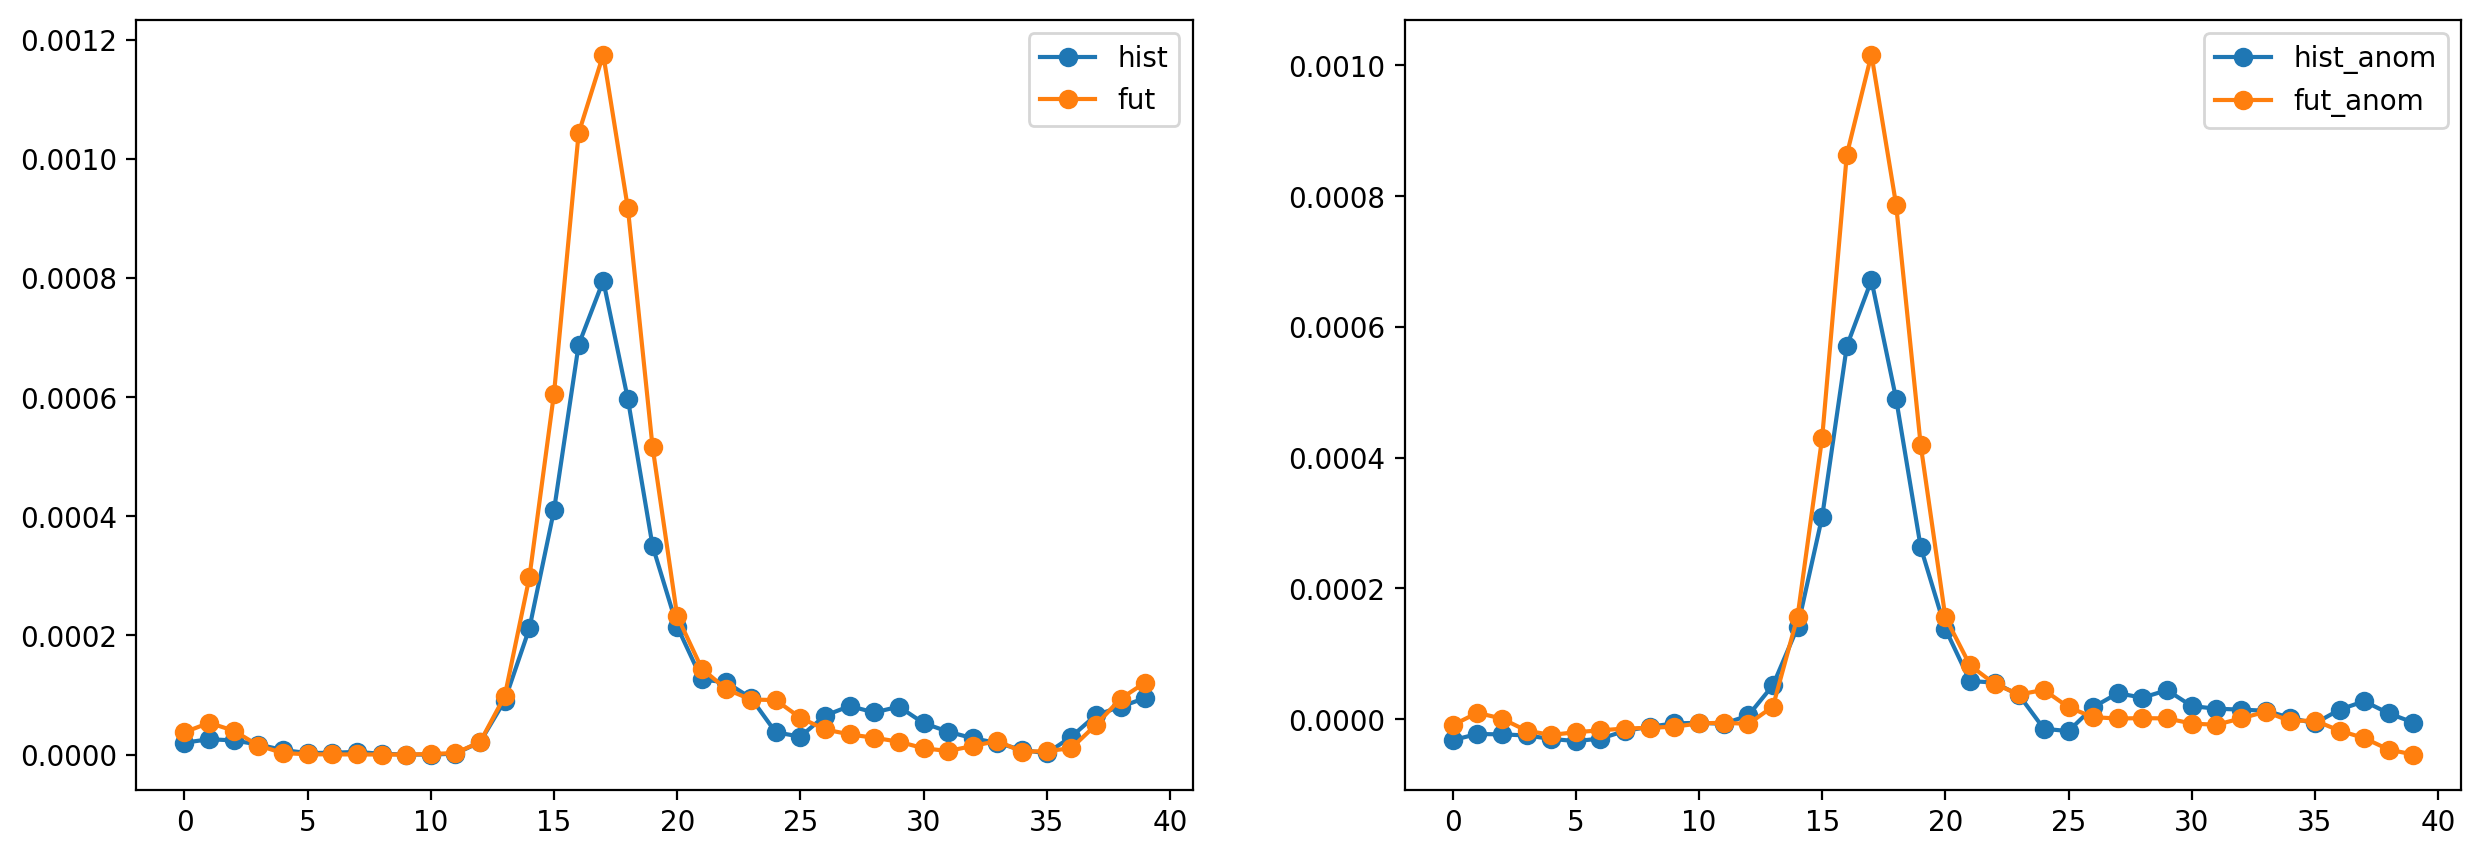

In [14]:
var = 'lsRain'
h = 17
mean = pkl.load(open(glob.glob(basefiles + 'timeseries/'+ var + '_timeseries_*_'+str(h)+'.p')[0], 'rb'))
anom = pkl.load(open(glob.glob(basefiles + 'timeseries/' + var + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(mean['CP4hist'], axis=0)[240:280]
fut = np.mean(mean['CP4fut'], axis=0)[240:280]
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.plot(hist, label='hist', marker='o')
plt.plot(fut, label='fut', marker='o')
plt.legend()


hist = np.mean(anom['CP4hist'], axis=0)[240:280]
fut = np.mean(anom['CP4fut'], axis=0)[240:280]
ax = f.add_subplot(122) 
plt.plot(hist, label='hist_anom', marker='o')
plt.plot(fut, label='fut_anom', marker='o')
plt.legend()

In [15]:
var = 't2'
h = 17
mean = pkl.load(open(glob.glob(basefiles + '/timeseries/' +  var + '_timeseries_*_'+str(h)+'.p')[0], 'rb'))
anom = pkl.load(open(glob.glob(basefiles + '/timeseries/' +  var + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(mean['CP4hist'], axis=0)
fut = np.mean(mean['CP4fut'], axis=0)
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.plot(hist, label='hist')
plt.plot(fut, label='fut')
plt.legend()


hist = np.mean(anom['CP4hist'], axis=0)
fut = np.mean(anom['CP4fut'], axis=0)
ax = f.add_subplot(122) 
plt.plot(hist, label='hist_anom')
plt.plot(fut, label='fut_anom')
plt.legend()

IndexError: list index out of range

90
90
80


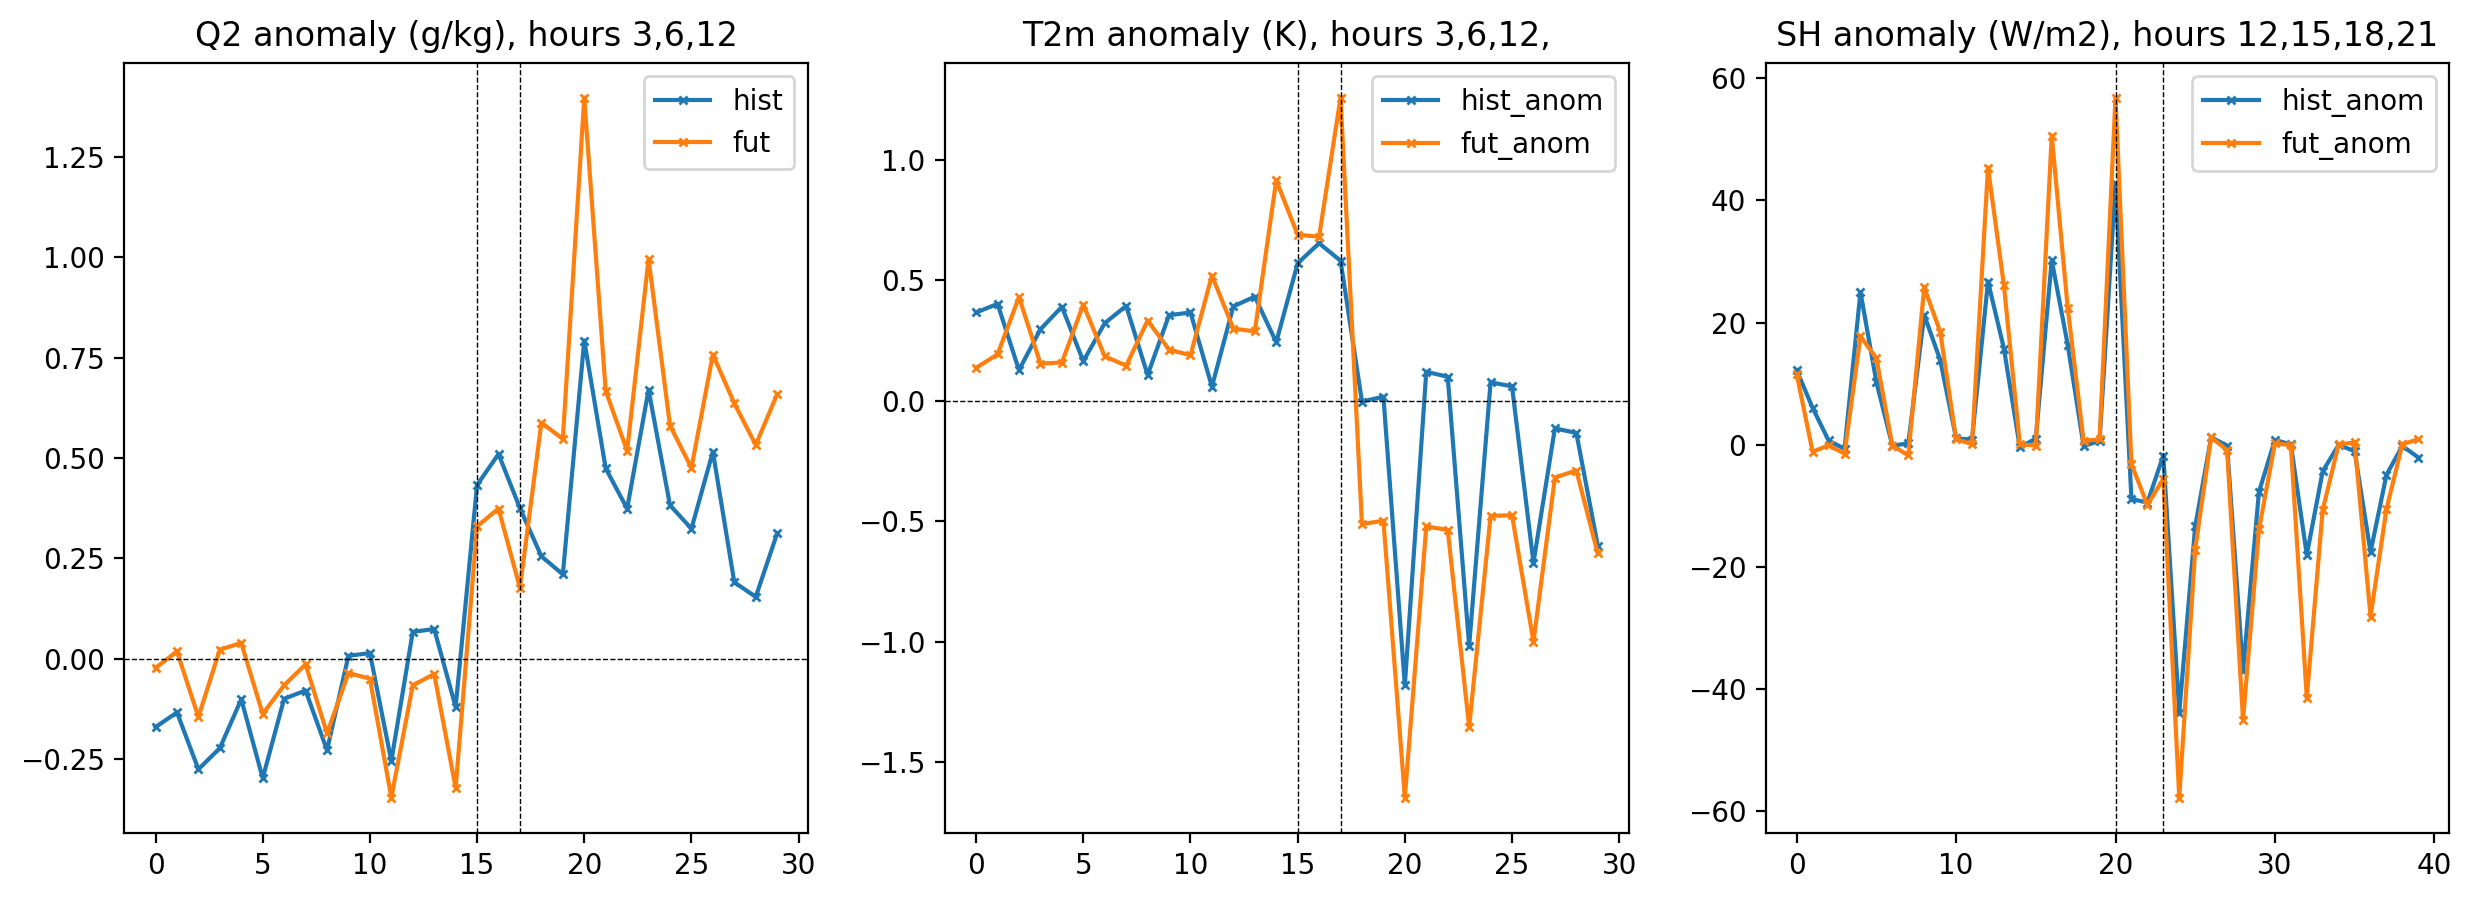

In [16]:
var = 't2'
h = 17
mean = pkl.load(open(glob.glob(basefiles + '/timeseries/' + 'q2' + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
anom = pkl.load(open(glob.glob(basefiles + '/timeseries/' + var + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(mean['CP4hist'], axis=0)*1000
fut = np.mean(mean['CP4fut'], axis=0)*1000
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(131) 
plt.plot(hist[30:-30], label='hist', marker='x', markersize=3)
plt.plot(fut[30:-30], label='fut', marker='x', markersize=3)
plt.legend()
print(len(fut))
ax.axvline(45-30, linestyle='dashed', linewidth=0.5, color='k')
ax.axvline(45-30+2, linestyle='dashed', linewidth=0.5, color='k')
ax.axhline(0, linestyle='dashed', linewidth=0.5, color='k')
ax.set_title('Q2 anomaly (g/kg), hours 3,6,12')


hist = np.mean(anom['CP4hist'], axis=0)
fut = np.mean(anom['CP4fut'], axis=0)
ax = f.add_subplot(132) 
plt.plot(hist[30:-30], label='hist_anom', markersize=3, marker='x')
plt.plot(fut[30:-30], label='fut_anom', markersize=3, marker='x')
plt.legend()
print(len(fut))
ax.axvline(45-30, linestyle='dashed', linewidth=0.5, color='k')
ax.axvline(45-30+2, linestyle='dashed', linewidth=0.5, color='k')
ax.axhline(0, linestyle='dashed', linewidth=0.5, color='k')
ax.set_title('T2m anomaly (K), hours 3,6,12,')

anom = pkl.load(open(glob.glob(basefiles + '/timeseries/' + 'sh' + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(anom['CP4hist'], axis=0)
fut = np.mean(anom['CP4fut'], axis=0)
ax = f.add_subplot(133) 
thresh = int(21/3*4)
#ipdb.set_trace()
plt.plot(hist[20:-20], label='hist_anom', markersize=3, marker='x')
plt.plot(fut[20:-20], label='fut_anom', markersize=3, marker='x')
ax.set_title('SH anomaly (W/m2), hours 12,15,18,21')

ax.axvline(20, linestyle='dashed', linewidth=0.5, color='k')
ax.axvline(20+3, linestyle='dashed', linewidth=0.5, color='k')
plt.legend()
print(len(fut))
# ax.axvline(45-21, linestyle='dashed', linewidth=0.5, color='k')
# ax.axhline(0, linestyle='dashed', linewidth=0.5, color='k')
f.savefig('/home/ck/DIR/cornkle/figs/LMCS/CP4_PNASstudy/pre-storm_timeseries_nearSurfaceVars.jpg')

(9186, 11, 115)
12.0 48.0
99
135.76450198781714 271.5290039756343


Text(0, 0.5, 'Wavelet coefficient mean')

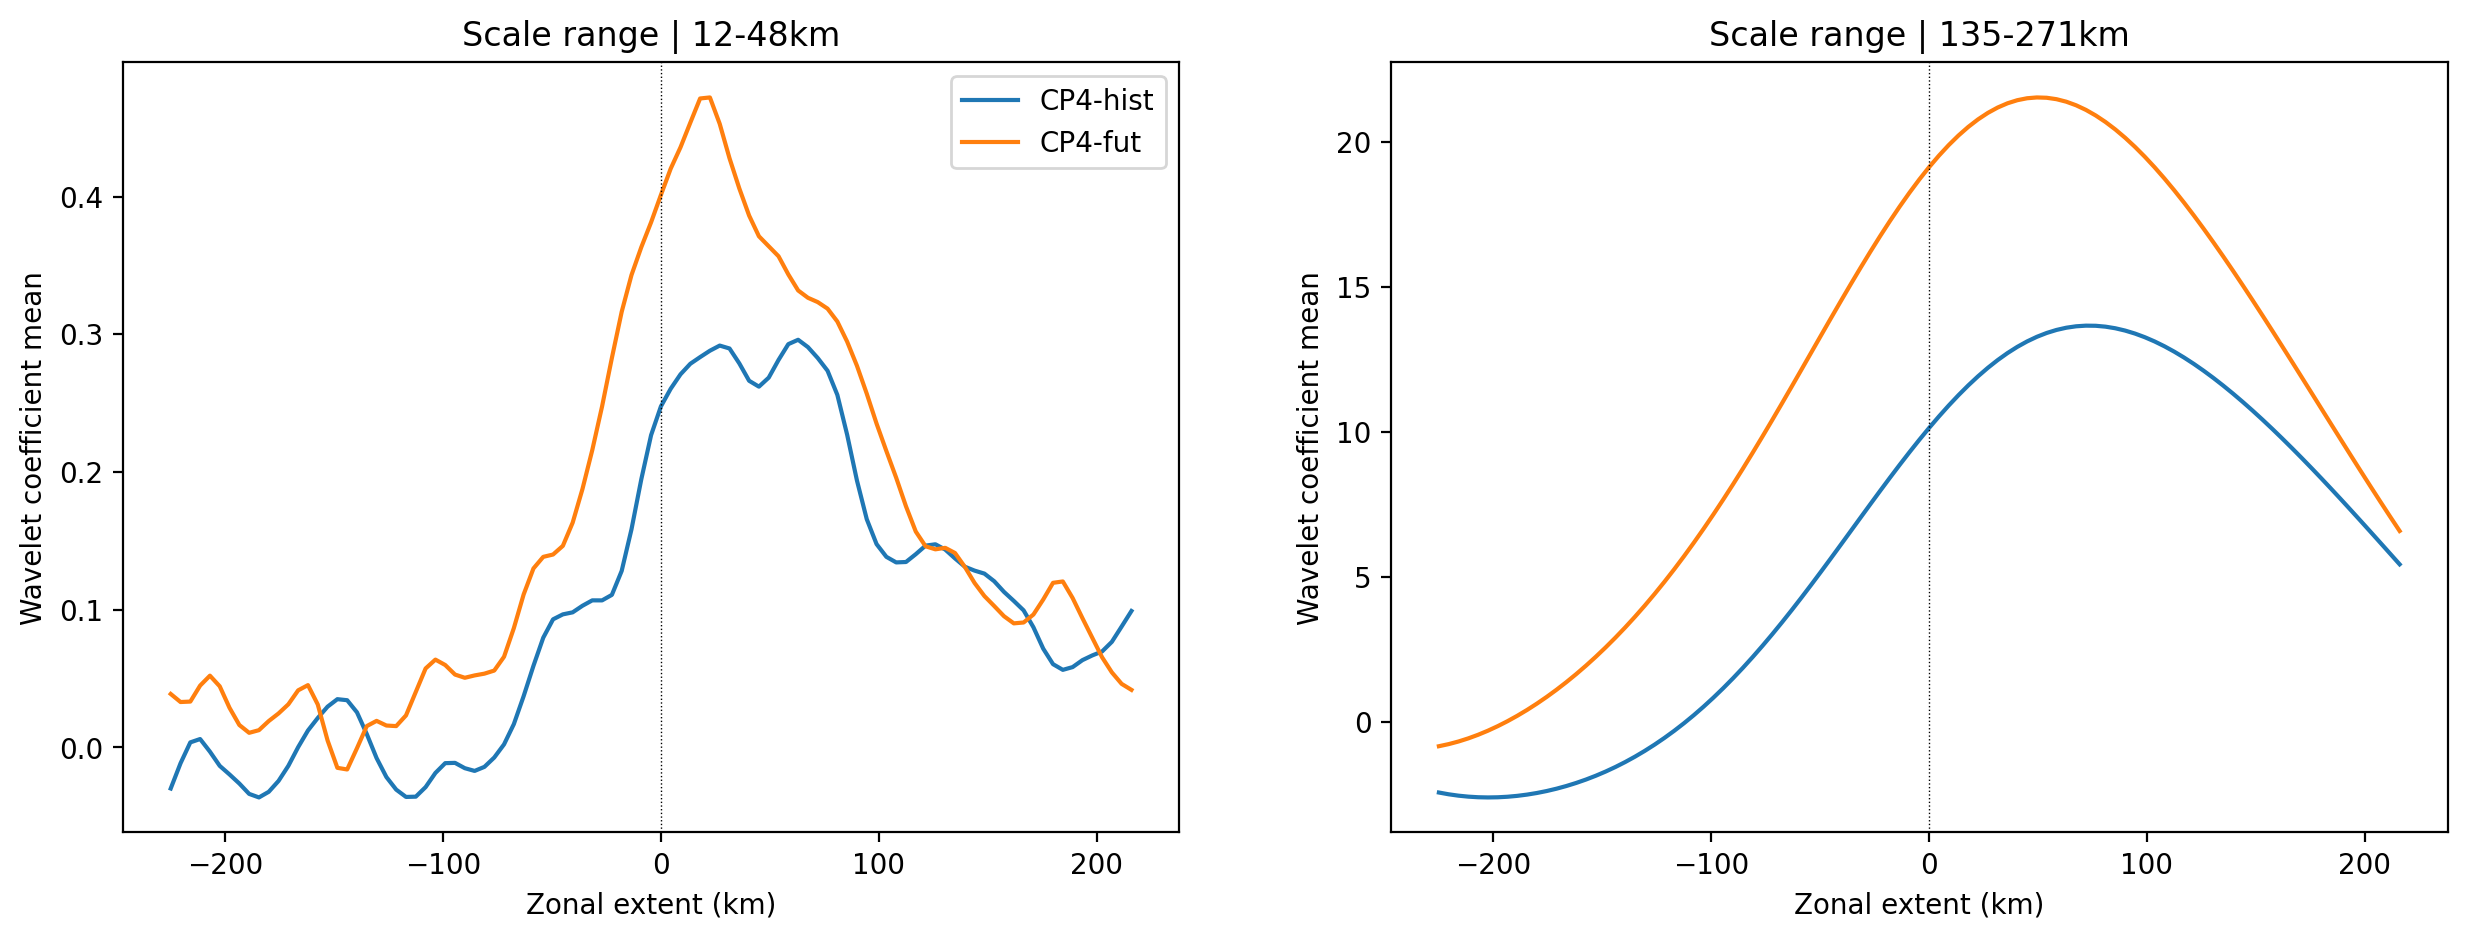

In [328]:
var = 't2'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
print(mean['scales'][0], mean['scales'][4])
histpart = hist[0:4,:].mean(axis=0)
futpart = fut[0:4,:].mean(axis=0) 
print(len(histpart))
hh = histpart#-histpart[0]
ff = futpart#-futpart[0]
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]

#ax.set_xticklabels()

plt.plot(plotrange[8:-8],hh, label='CP4-hist')
plt.plot(plotrange[8:-8],ff, label='CP4-fut')
plt.title('Scale range | '+str(int(mean['scales'][0]))+'-'+str(int(mean['scales'][4]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')
plt.legend()
    
 
ax = f.add_subplot(122)
    
histpart = hist[-4:-2,:].mean(axis=0)
futpart = fut[-4:-2,:].mean(axis=0)

print(mean['scales'][-4], mean['scales'][-2])

hh = histpart#-histpart[0]
ff = futpart#-futpart[0]

plt.plot(plotrange[8:-8],hh)
plt.plot(plotrange[8:-8],ff)
plt.title('Scale range | '+str(int(mean['scales'][-4]))+'-'+str(int(mean['scales'][-2]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')

(530, 11, 163)
(530, 11, 163)
(9186, 11, 115)
(9186, 11, 115)
(9186, 11, 115)
(9186, 11, 115)
(9186, 11, 115)


SyntaxError: keyword argument repeated: levels (2767700519.py, line 162)

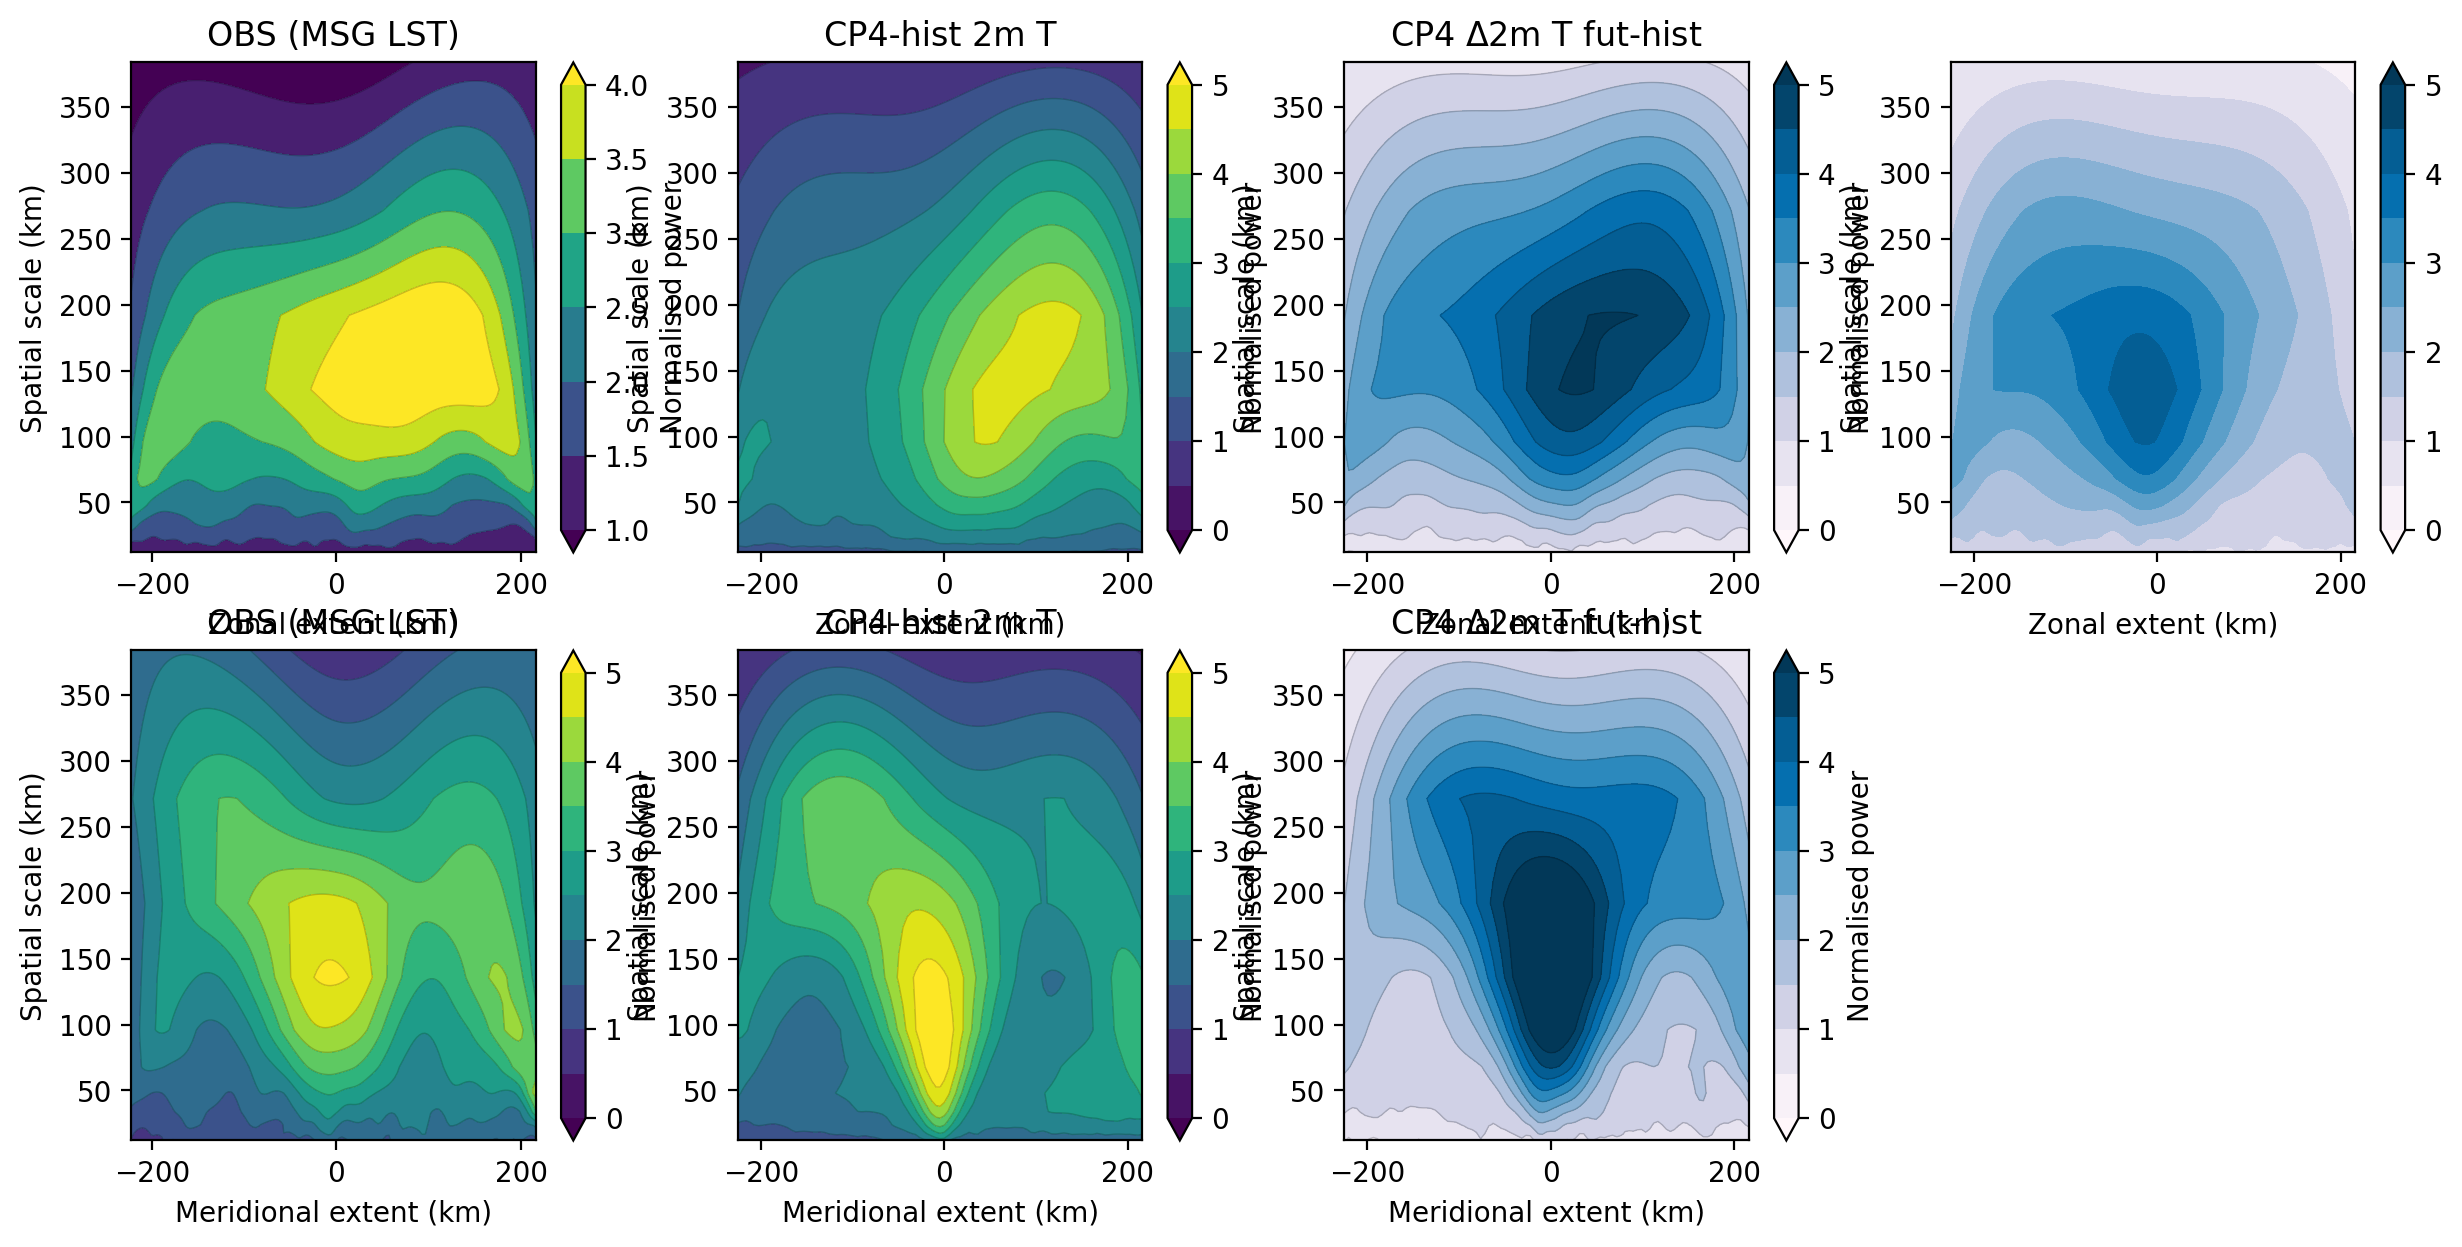

In [426]:
var = 'LSTA'
h = 17
f=plt.figure(figsize=(15,7), dpi=200)

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['OBS']).shape)
hist = np.nanmean(mean['OBS'],axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])

scales = mean['scales']
ranges = (np.arange(163))*3
plotrange = ranges-ranges[82]


ax = f.add_subplot(241) 
plt.contourf(plotrange[8:-8], scales, hist/np.std(hist), cmap='viridis', extend='both')  #, levels=np.arange(0,5.1, 0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales, hist/np.std(hist) ,colors='k', alpha=0.2, linewidths=0.5)
cbar.set_label('Normalised power')
plt.title('OBS (MSG LST)')


mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_yposOnly.p')[0], 'rb'))

print(np.array(mean['OBS']).shape)
hist = np.nanmean(mean['OBS'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])


scales = mean['scales']
ranges = (np.arange(163))*3
plotrange = ranges-ranges[82]
#ipdb.set_trace()

ax = f.add_subplot(245) 
plt.contourf(plotrange[8:-8], scales, hist/np.std(hist), cmap='viridis', levels=np.arange(0,5.1,0.5), extend='both')
ax.set_xlabel('Meridional extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales, (hist)/np.std(hist),colors='k', levels=np.arange(0,5.1,0.5), alpha=0.2, linewidths=0.5)
cbar.set_label('Normalised power')
plt.title('OBS (MSG LST)')


var = 't2'
#h = 17
#f=plt.figure(figsize=(10,4), dpi=200)

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(242) 
plt.contourf(plotrange[8:-8], scales, (hist/np.std(hist)), cmap='viridis', levels=np.arange(0,5.1,0.5), extend='both')
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales, (hist)/np.std(hist),colors='k', levels=np.arange(0,5.1,0.5), alpha=0.2, linewidths=0.5)
cbar.set_label('Normalised power')
plt.title('CP4-hist 2m T')


mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_yposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(246) 
plt.contourf(plotrange[8:-8], scales, (hist)/np.std(hist), cmap='viridis', levels=np.arange(0,5.1,0.5), extend='both')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales, (hist)/np.std(hist),colors='k', levels=np.arange(0,5.1,0.5), alpha=0.2, linewidths=0.5)
ax.set_xlabel('Meridional extent (km)')
ax.set_ylabel('Spatial scale (km)')

cbar.set_label('Normalised power')
plt.title('CP4-hist 2m T')
##################################
var = 't2'
#h = 17
#f=plt.figure(figsize=(10,4), dpi=200)

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(243) 

plt.contourf(plotrange[8:-8], scales, (fut-hist)/np.std(hist), cmap='PuBu', extend='both', levels=np.arange(0,5.1,0.5))
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales, (fut-hist)/np.std(hist),colors='k', levels=np.arange(0,5.1,0.5), alpha=0.2, linewidths=0.5)
cbar.set_label('Normalised power')
plt.title('CP4 $\Delta$2m T fut-hist')
6

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_yposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(247) 

plt.contourf(plotrange[8:-8], scales, (fut-hist)/np.std(hist), cmap='PuBu', extend='both', levels=np.arange(0,5.1,0.5))
ax.set_xlabel('Meridional extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales,(fut-hist)/np.std(hist),colors='k', alpha=0.2, linewidths=0.5, levels=np.arange(0,5.1,0.5))
cbar.set_label('Normalised power')
plt.title('CP4 $\Delta$2m T fut-hist')

###############################

var = 'sh'
#h = 17
#f=plt.figure(figsize=(10,4), dpi=200)

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(244) 

plt.contourf(plotrange[8:-8], scales, (fut-hist)/np.std(hist), cmap='PuBu', extend='both', levels=np.arange(0,5.1,0.5))
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales, (fut-hist)/np.std(hist),colors='k', levels=np.arange(0,5.1,0.5), alpha=0.2, linewidths=0.5, levels=np.arange(0,5.1,0.5))
cbar.set_label('Normalised power')
plt.title('CP4 $\Delta$SH fut-hist')
6

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_yposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(248) 

plt.contourf(plotrange[8:-8], scales, (fut-hist)/np.std(hist), cmap='PuBu', extend='both', levels=np.arange(0,5.1,0.5))
ax.set_xlabel('Meridional extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales,(fut-hist)/np.std(hist),colors='k', alpha=0.2, linewidths=0.5, levels=np.arange(0,5.1,0.5))
cbar.set_label('Normalised power')
plt.title('CP4 $\Delta$SH fut-hist')

plt.tight_layout()
f.savefig('/home/ck/DIR/cornkle/figs/LMCS/CP4_PNASstudy/MSG_CPhist_wavCoeffs_perStorm_AmplitudeChange.jpg')

(530, 11, 163)
(530, 11, 163)
(9186, 11, 115)
(9186, 11, 115)
(9186, 11, 115)
(9186, 11, 115)
(9186, 11, 115)
(9186, 11, 115)


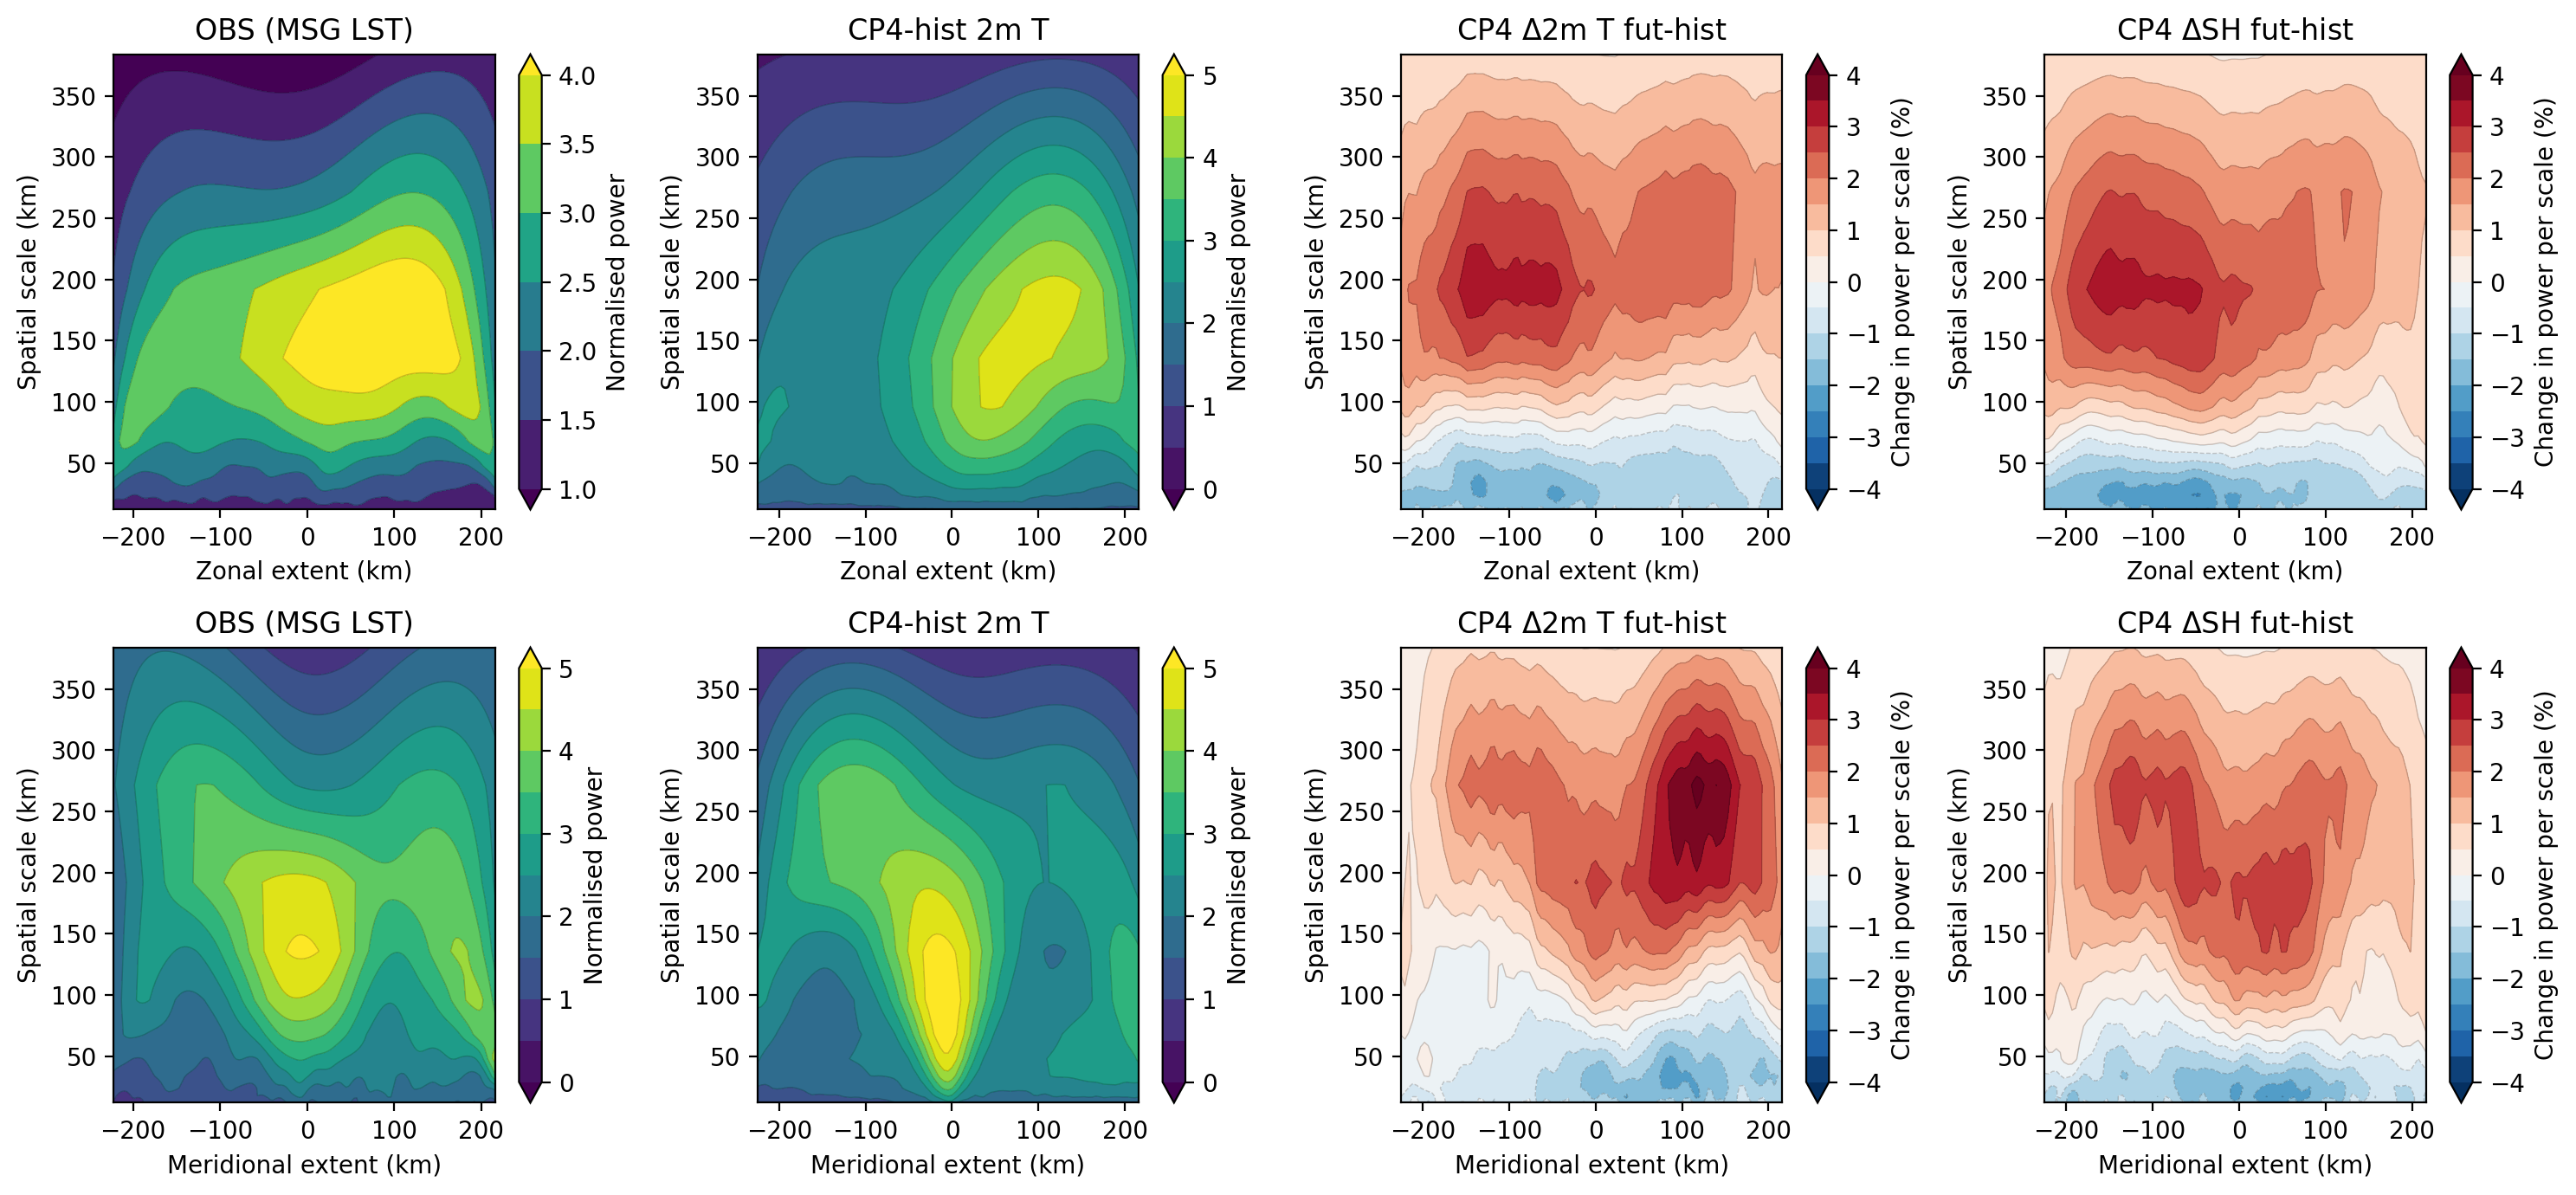

In [435]:
var = 'LSTA'
h = 17
f=plt.figure(figsize=(15,7), dpi=200)

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['OBS']).shape)
hist = np.nanmean(mean['OBS'],axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])

scales = mean['scales']
ranges = (np.arange(163))*3
plotrange = ranges-ranges[82]


ax = f.add_subplot(241) 
plt.contourf(plotrange[8:-8], scales, hist/np.std(hist), cmap='viridis', extend='both')  #, levels=np.arange(0,5.1, 0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales, hist/np.std(hist) ,colors='k', alpha=0.2, linewidths=0.5)
cbar.set_label('Normalised power')
plt.title('OBS (MSG LST)')


mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_yposOnly.p')[0], 'rb'))

print(np.array(mean['OBS']).shape)
hist = np.nanmean(mean['OBS'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])


scales = mean['scales']
ranges = (np.arange(163))*3
plotrange = ranges-ranges[82]
#ipdb.set_trace()

ax = f.add_subplot(245) 
plt.contourf(plotrange[8:-8], scales, hist/np.std(hist), cmap='viridis', levels=np.arange(0,5.1,0.5), extend='both')
ax.set_xlabel('Meridional extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales, (hist)/np.std(hist),colors='k', levels=np.arange(0,5.1,0.5), alpha=0.2, linewidths=0.5)
cbar.set_label('Normalised power')
plt.title('OBS (MSG LST)')


var = 't2'
#h = 17
#f=plt.figure(figsize=(10,4), dpi=200)

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(242) 
plt.contourf(plotrange[8:-8], scales, (hist/np.std(hist)), cmap='viridis', levels=np.arange(0,5.1,0.5), extend='both')
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales, (hist)/np.std(hist),colors='k', levels=np.arange(0,5.1,0.5), alpha=0.2, linewidths=0.5)
cbar.set_label('Normalised power')
plt.title('CP4-hist 2m T')


mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_yposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(246) 
plt.contourf(plotrange[8:-8], scales, (hist)/np.std(hist), cmap='viridis', levels=np.arange(0,5.1,0.5), extend='both')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales, (hist)/np.std(hist),colors='k', levels=np.arange(0,5.1,0.5), alpha=0.2, linewidths=0.5)
ax.set_xlabel('Meridional extent (km)')
ax.set_ylabel('Spatial scale (km)')

cbar.set_label('Normalised power')
plt.title('CP4-hist 2m T')
##################################
var = 't2'
#h = 17
#f=plt.figure(figsize=(10,4), dpi=200)

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(243) 

plt.contourf(plotrange[8:-8], scales, (fut/np.sum(fut, axis=0)-hist/np.sum(hist, axis=0))*100, cmap='RdBu_r', extend='both', levels=np.arange(-4,4.1,0.5))
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales,  (fut/np.sum(fut, axis=0)-hist/np.sum(hist, axis=0))*100,colors='k', alpha=0.2, linewidths=0.5, levels=np.arange(-4,4.1,0.5))
cbar.set_label('Change in power per scale (%)')
plt.title('CP4 $\Delta$2m T fut-hist')
6

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_yposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(247) 

plt.contourf(plotrange[8:-8], scales,  (fut/np.sum(fut, axis=0)-hist/np.sum(hist, axis=0))*100, cmap='RdBu_r', extend='both', levels=np.arange(-4,4.1,0.5))
ax.set_xlabel('Meridional extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales, (fut/np.sum(fut, axis=0)-hist/np.sum(hist, axis=0))*100,colors='k', alpha=0.2, linewidths=0.5, levels=np.arange(-4,4.1,0.5))
cbar.set_label('Change in power per scale (%)')
plt.title('CP4 $\Delta$2m T fut-hist')

###############################

var = 'sh'
#h = 17
#f=plt.figure(figsize=(10,4), dpi=200)

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(244) 

plt.contourf(plotrange[8:-8], scales,  (fut/np.sum(fut, axis=0)-hist/np.sum(hist, axis=0))*100, cmap='RdBu_r', extend='both', levels=np.arange(-4,4.1,0.5))
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales,  (fut/np.sum(fut, axis=0)-hist/np.sum(hist, axis=0))*100,colors='k', alpha=0.2, linewidths=0.5, levels=np.arange(-4,4.1,0.5))
cbar.set_label('Change in power per scale (%)')
plt.title('CP4 $\Delta$SH fut-hist')
6

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_yposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(248) 

plt.contourf(plotrange[8:-8], scales,  (fut/np.sum(fut, axis=0)-hist/np.sum(hist, axis=0))*100, cmap='RdBu_r', extend='both', levels=np.arange(-4,4.1,0.5))
ax.set_xlabel('Meridional extent (km)')
ax.set_ylabel('Spatial scale (km)')
cbar = plt.colorbar()
plt.contour(plotrange[8:-8], scales,  (fut/np.sum(fut, axis=0)-hist/np.sum(hist, axis=0))*100 ,colors='k', alpha=0.2, linewidths=0.5, levels=np.arange(-4,4.1,0.5))
cbar.set_label('Change in power per scale (%)')
plt.title('CP4 $\Delta$SH fut-hist')

plt.tight_layout()
f.savefig('/home/ck/DIR/cornkle/figs/LMCS/CP4_PNASstudy/MSG_CPhist_wavCoeffs_perStorm_ScaleShift.jpg')

(1000, 11, 115)
12.0 48.0
99
135.76450198781714 271.5290039756343


Text(0, 0.5, 'Wavelet coefficient mean')

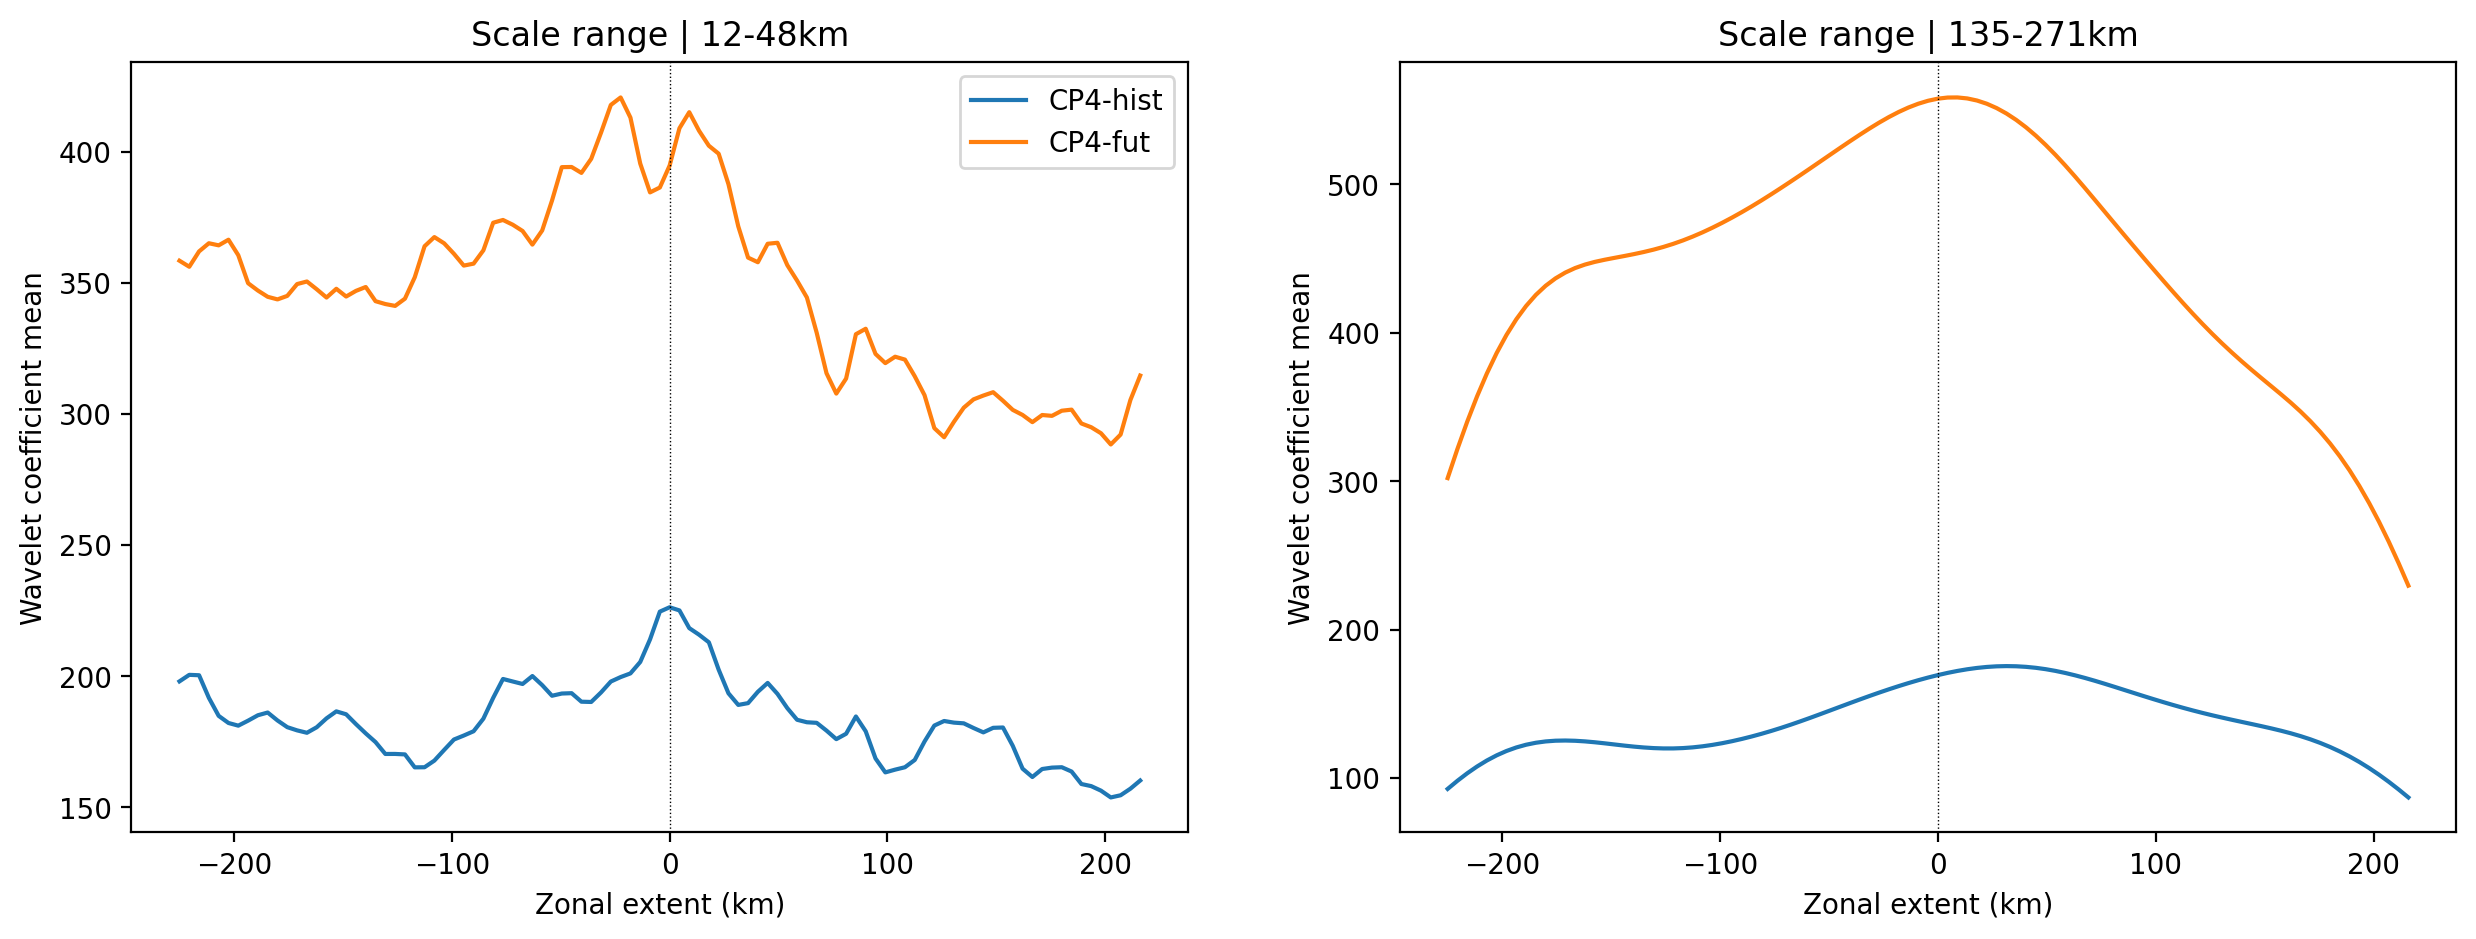

In [159]:
var = 'sh'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_x.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
print(mean['scales'][0], mean['scales'][4])
histpart = hist[0:4,:].mean(axis=0)
futpart = fut[0:4,:].mean(axis=0) 
print(len(histpart))
hh = histpart#-histpart[0]
ff = futpart#-futpart[0]
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]

#ax.set_xticklabels()

plt.plot(plotrange[8:-8],hh, label='CP4-hist')
plt.plot(plotrange[8:-8],ff, label='CP4-fut')
plt.title('Scale range | '+str(int(mean['scales'][0]))+'-'+str(int(mean['scales'][4]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')
plt.legend()
    
 
ax = f.add_subplot(122)
    
histpart = hist[-4:-2,:].mean(axis=0)
futpart = fut[-4:-2,:].mean(axis=0)

print(mean['scales'][-4], mean['scales'][-2])

hh = histpart#-histpart[0]
ff = futpart#-futpart[0]

plt.plot(plotrange[8:-8],hh)
plt.plot(plotrange[8:-8],ff)
plt.title('Scale range | '+str(int(mean['scales'][-4]))+'-'+str(int(mean['scales'][-2]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')

In [80]:
lahist = pd.read_csv('/home/ck/DIR/cornkle/data/LMCS/MCS_files/CP4_box/hist_table_1700_inclStormChar_anom_200km.csv', index_col=0).transpose()
lafut =  pd.read_csv('/home/ck/DIR/cornkle/data/LMCS/MCS_files/CP4_box/fut_table_1700_inclStormChar_anom_200km.csv', index_col=0).transpose()

In [84]:
for var in lahist.keys():
    try:
        lahist[var] = lahist[var].astype(float)
    except:
        pass
for var in lafut.keys():
    try:
        lafut[var] = lafut[var].astype(float)
    except:
        pass

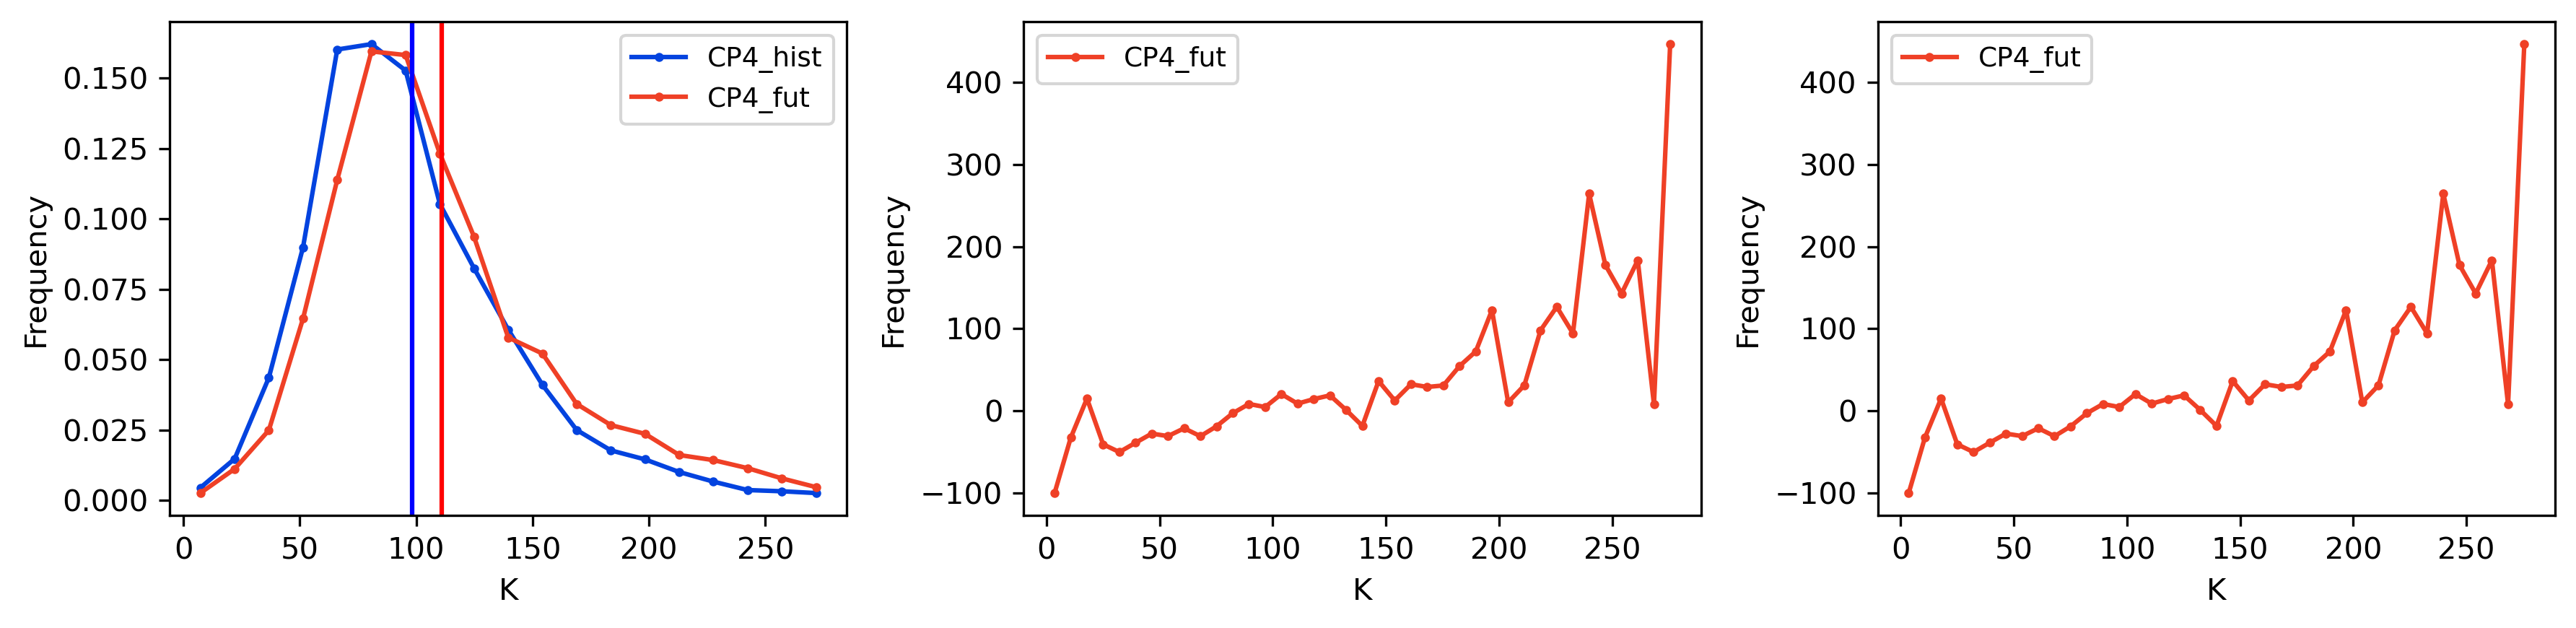

In [145]:
f=plt.figure(figsize=(12,3), dpi=300)
ax0 = f.add_subplot(131)
var = 'area_1mm'
hist_d = np.sqrt(lahist.area_1mm*(5**2)/np.pi)*2
fut_d = np.sqrt(lafut.area_1mm*(5**2)/np.pi)*2
cp4 = hist2d.basic_1d_binning(hist_d, np.linspace(np.min(hist_d), np.percentile(fut_d,99),20))
cp4f = hist2d.basic_1d_binning(fut_d, np.linspace(np.min(hist_d), np.percentile(fut_d,99),20))
plt.plot(cp4['xbins'], cp4['nb']/np.sum(cp4['nb']), color='xkcd:blue', label='CP4_hist', marker='o', markersize=2)
plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb']), color='xkcd:tomato', label='CP4_fut', marker='o', markersize=2)
ax0.axvline(np.mean(hist_d), color='b')
ax0.axvline(np.mean(fut_d), color='r')
plt.ylabel('Frequency')
plt.xlabel('K')
#plt.title('Anomaly: theta-e from q925 | $\Delta$ ='+str(np.round(np.nanmean(lafut[var]-thet_fut)-np.nanmean(lahist[var]-thet_hist),3)))
# ax.axvline(np.nanmean(lahist[var]-thet_hist), color='b', linestyle='dashed', linewidth=0.5)
# ax.axvline(np.nanmean(lafut[var]-thet_fut), color='r', linestyle='dashed', linewidth=0.5)
plt.legend(fontsize=9)



ax0 = f.add_subplot(132)
var = 'area_1mm'
hist_d = np.sqrt(lahist.area_1mm*(5**2)/np.pi)*2
fut_d = np.sqrt(lafut.area_1mm*(5**2)/np.pi)*2
cp4 = hist2d.basic_1d_binning(hist_d, np.linspace(np.min(hist_d), np.percentile(fut_d,99),40))
cp4f = hist2d.basic_1d_binning(fut_d, np.linspace(np.min(hist_d), np.percentile(fut_d,99),40))

hhist = cp4['nb']/np.sum(cp4['nb'])
ffut = cp4f['nb']/np.sum(cp4f['nb'])

plt.plot(cp4f['xbins'], (ffut-hhist)/hhist*100, color='xkcd:tomato', label='CP4_fut', marker='o', markersize=2)
plt.ylabel('Frequency')
plt.xlabel('K')
#plt.title('Anomaly: theta-e from q925 | $\Delta$ ='+str(np.round(np.nanmean(lafut[var]-thet_fut)-np.nanmean(lahist[var]-thet_hist),3)))
# ax.axvline(np.nanmean(lahist[var]-thet_hist), color='b', linestyle='dashed', linewidth=0.5)
# ax.axvline(np.nanmean(lafut[var]-thet_fut), color='r', linestyle='dashed', linewidth=0.5)
plt.legend(fontsize=9)

ax0 = f.add_subplot(133)
var = 'area_1mm'
hist_d = np.sqrt(lahist.area_1mm*(5**2)/np.pi)*2
fut_d = np.sqrt(lafut.area_1mm*(5**2)/np.pi)*2
cp4 = hist2d.basic_1d_binning(hist_d, np.linspace(np.min(hist_d), np.percentile(fut_d,99),40))
cp4f = hist2d.basic_1d_binning(fut_d, np.linspace(np.min(hist_d), np.percentile(fut_d,99),40))

hhist = cp4['nb']/np.sum(cp4['nb'])
ffut = cp4f['nb']/np.sum(cp4f['nb'])

plt.plot(cp4f['xbins'], (((ffut/np.sum(ffut)-hhist/np.sum(hhist)))/(hhist/np.sum(hhist)))*100, color='xkcd:tomato', label='CP4_fut', marker='o', markersize=2)
plt.ylabel('Frequency')
plt.xlabel('K')
#plt.title('Anomaly: theta-e from q925 | $\Delta$ ='+str(np.round(np.nanmean(lafut[var]-thet_fut)-np.nanmean(lahist[var]-thet_hist),3)))
# ax.axvline(np.nanmean(lahist[var]-thet_hist), color='b', linestyle='dashed', linewidth=0.5)
# ax.axvline(np.nanmean(lafut[var]-thet_fut), color='r', linestyle='dashed', linewidth=0.5)
plt.legend(fontsize=9)
plt.tight_layout()

In [136]:
np.sqrt(np.mean(lafut.area_1mm*(5**2))/np.pi)*2

122.87775889188595

In [137]:
np.sqrt(np.mean(lahist.area_1mm*(5**2))/np.pi)*2

107.98231436148704

(60, 11)
(60, 11)
(60, 11)
(60, 11)


Text(0.5, 46.16666666666663, 'Scales (km)')

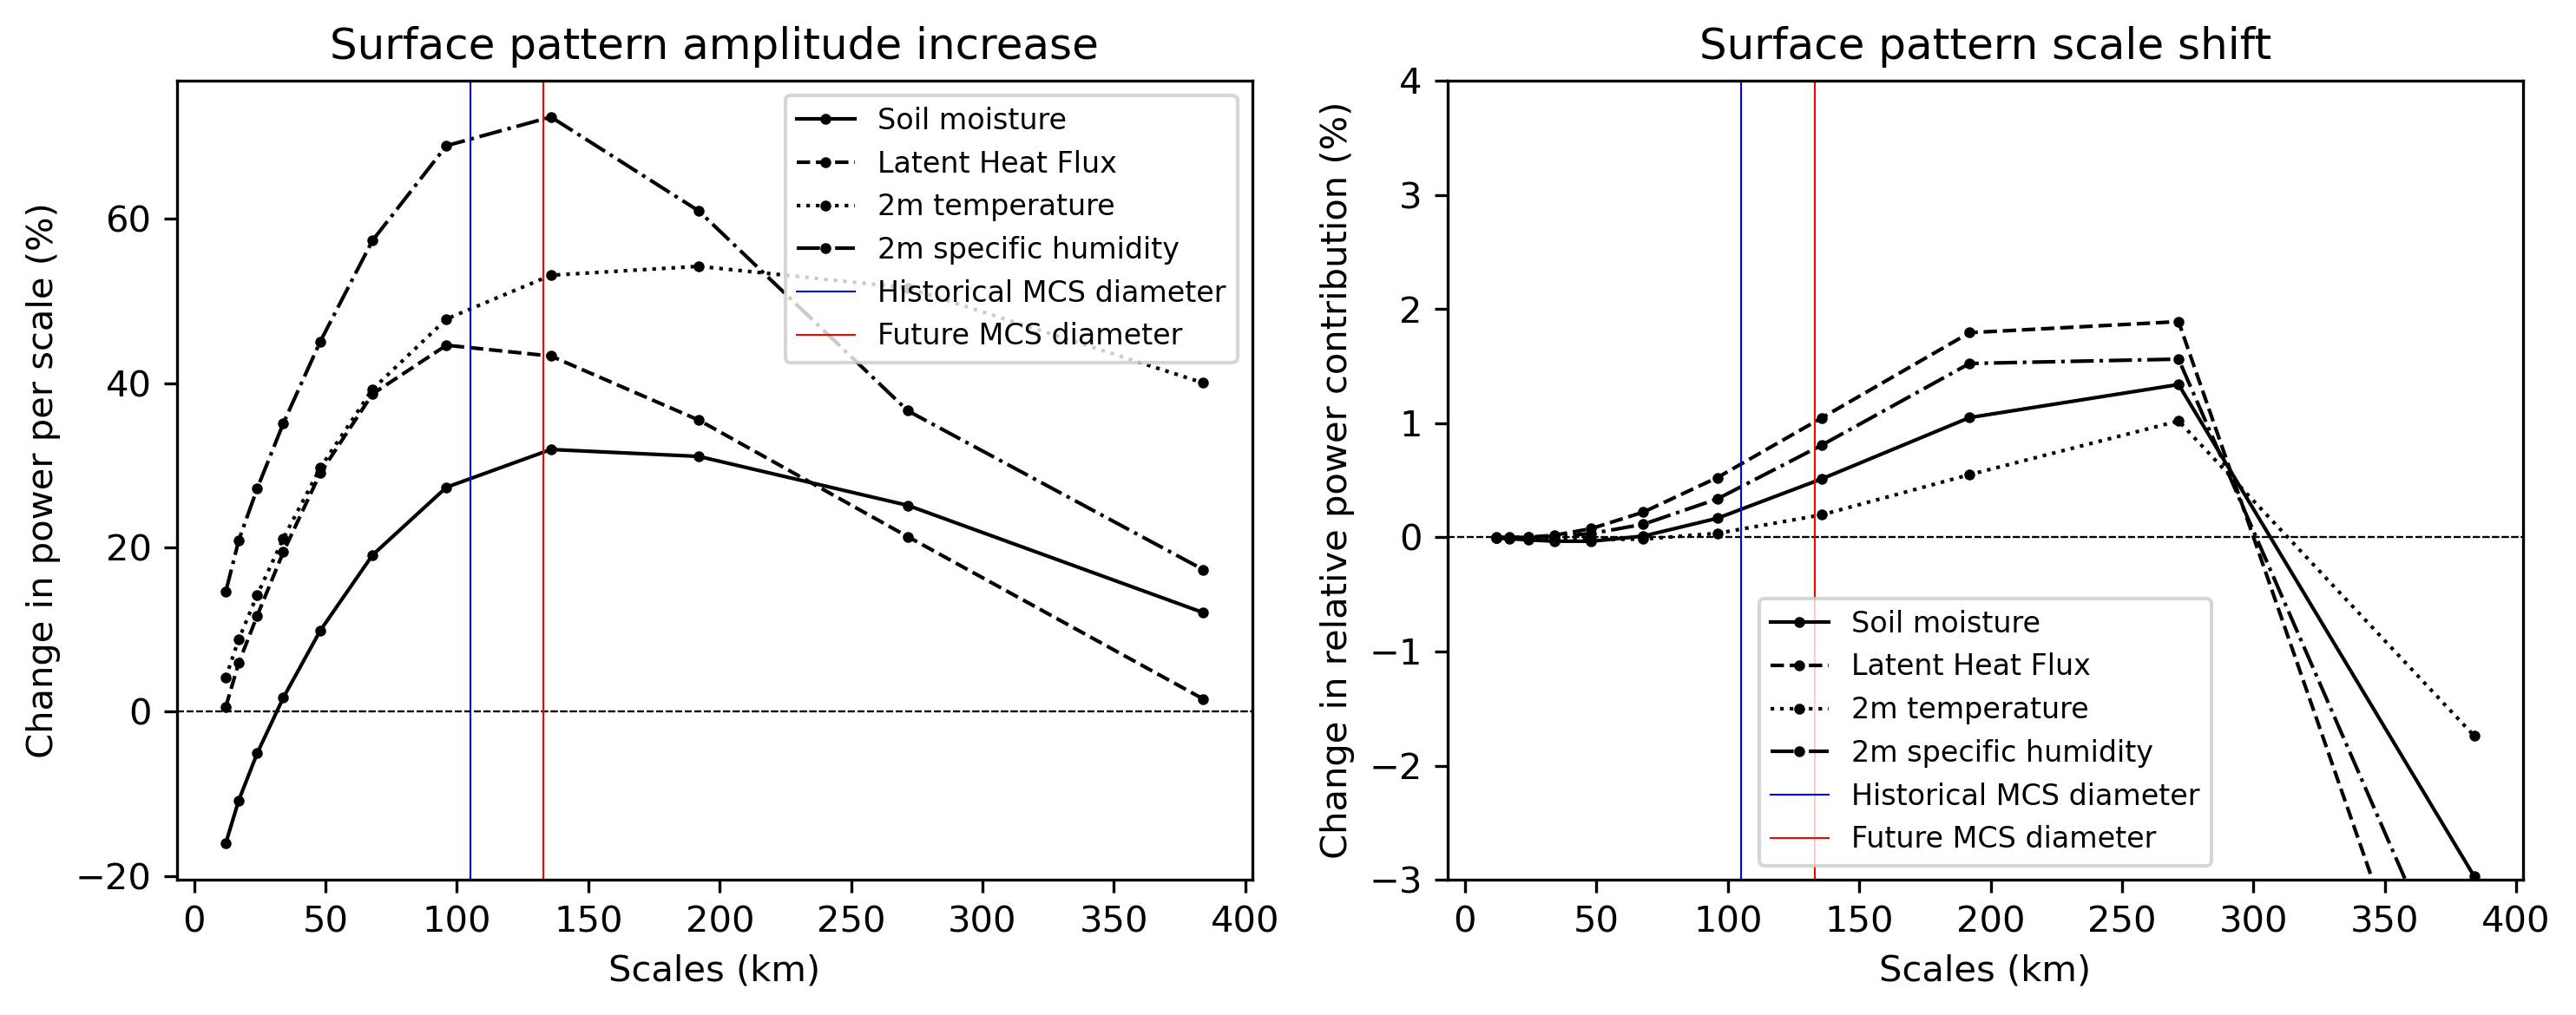

In [61]:
normtag = '{none}'
f=plt.figure(figsize=(10,4), dpi=300)
ax0 = f.add_subplot(122)
ax = f.add_subplot(121) 
#ax1 = f.add_subplot(133) 
for vart in [('SM','solid','Soil moisture'), ('lh','dashed','Latent Heat Flux'),('t2','dotted', '2m temperature'), ('q2','dashdot', '2m specific humidity')]:#, ('tcwv','')]:
    h = 17
    var=vart[0]
    tag = ''
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_both_'+normtag+'_17N.p')[0], 'rb'))
    if vart == 'sh':
        mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_negOnly_17N.p')[0], 'rb'))
    
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)

    ax.plot(scales, ((fut-hist)/hist)*100, marker='o', color='k', linestyle=vart[1], linewidth=1, markersize=2, label=vart[2])
    ax.axhline(0, linestyle='dashed', color='k', linewidth=0.5)
    

    
    ax0.plot(scales, ((fut)/np.sum(fut)- (hist)/np.sum(hist))*100, marker='o', color='k', linestyle=vart[1], linewidth=1, markersize=2, label=vart[2])
    ax0.axhline(0, linestyle='dashed', color='k', linewidth=0.5)
    


#     if vart[0] in ['SM']:
#         ax1.plot(scales, (hist)/np.sum(hist)*100, label=var+'_hist', marker='o')
#         ax1.plot(scales, (fut)/np.sum(fut)*100, label=var+'_fut', marker='o')
#         ax1.set_ylabel('Relative contribution of scale to total power (%)')
#         plt.title('Scale shift')
#         ax1.set_xlabel('Scales (km)')
ax.axvline(105, linestyle='solid', color='b', linewidth=0.5, label='Historical MCS diameter')
ax.axvline(133, linestyle='solid', color='r', linewidth=0.5, label='Future MCS diameter')
ax0.axvline(105, linestyle='solid', color='b', linewidth=0.5, label='Historical MCS diameter')
ax0.axvline(133, linestyle='solid', color='r', linewidth=0.5, label='Future MCS diameter')
ax.legend(fontsize=8)
ax0.legend(fontsize=8)
ax0.set_ylim(-3,4)
ax.set_title('Surface pattern amplitude increase')
ax0.set_title('Surface pattern scale shift')
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Change in power per scale (%)')
ax0.set_ylabel('Change in relative power contribution (%)')
plt.tight_layout()
ax0.set_xlabel('Scales (km)')
#f.savefig('/home/ck/DIR/cornkle/figs/LMCS/CP4_PNASstudy/fullDomain_CP4fut-CP4hist.jpg')

In [22]:
var='lh'
mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_both_17N_P25.p')[0], 'rb'))

In [23]:
other_mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_negOnly_17N_P25.p')[0], 'rb'))

In [24]:
mean

{'CP4hist': [array([2160.08226347, 1915.8050893 , 1287.54894208,  973.50474903,
          954.09558663, 1086.23948367, 1247.2485088 , 1323.35916829,
         1741.32798983]),
  array([477.72371931, 465.97181108, 370.87297977, 316.54872996,
         308.21867474, 331.23172662, 362.82237427, 358.1151606 ,
         441.31154558]),
  array([18.30862868, 24.30172964, 29.45820219, 34.212963  , 36.81435339,
         41.33778622, 51.20321932, 55.76748633, 53.53232117]),
  array([16.01552006, 23.14700714, 29.91207803, 33.68133135, 32.58762737,
         31.20780793, 30.77667372, 27.62497859, 28.27954529]),
  array([1488.14823427, 1379.00253485, 1104.1031483 , 1031.09012245,
         1150.22572855, 1399.87978706, 1652.24789535, 2020.06829141,
         3131.727663  ]),
  array([ 347.03413855,  336.13040999,  294.66466312,  299.14492821,
          353.33082354,  439.90419936,  636.95411918,  946.80830623,
         1296.82697949]),
  array([13.60209624, 18.53359836, 22.7666047 , 27.83888293, 33.7964

In [25]:
other_mean

{'CP4hist': [array([1137.31986143,  959.3248808 ,  575.55884776,  363.92899272,
          296.82665359,  288.06057719,  251.74302337,  208.53430047,
          104.88213618]),
  array([225.51055738, 200.67317395, 144.88391149, 113.6919499 ,
          89.42411287,  70.47460169,  49.25740359,  19.78378613,
           2.48790434]),
  array([6.33835852, 7.4566955 , 8.37345559, 9.15514145, 9.19420879,
         9.23615207, 9.65727366, 6.52604241, 1.55675368]),
  array([4.61323948, 5.95572556, 7.31468076, 7.58416344, 6.20336941,
         5.59421424, 5.07036202, 2.91673819, 1.47866372]),
  array([830.50297992, 736.52767138, 546.79170669, 481.15614087,
         488.89912714, 512.32906365, 445.68480502, 247.34589944,
          78.29534183]),
  array([191.30753689, 169.48632596, 125.55059794, 105.83733319,
         103.38953532, 120.09672046, 138.37610552, 106.46044565,
          21.24798093]),
  array([ 5.33682997,  7.18070151,  8.82755491, 11.07544515, 12.6729453 ,
         13.12708791, 12.98899

(60, 11)
(60, 11)
(60, 11)
(240, 9)
(180, 9)
(180, 9)


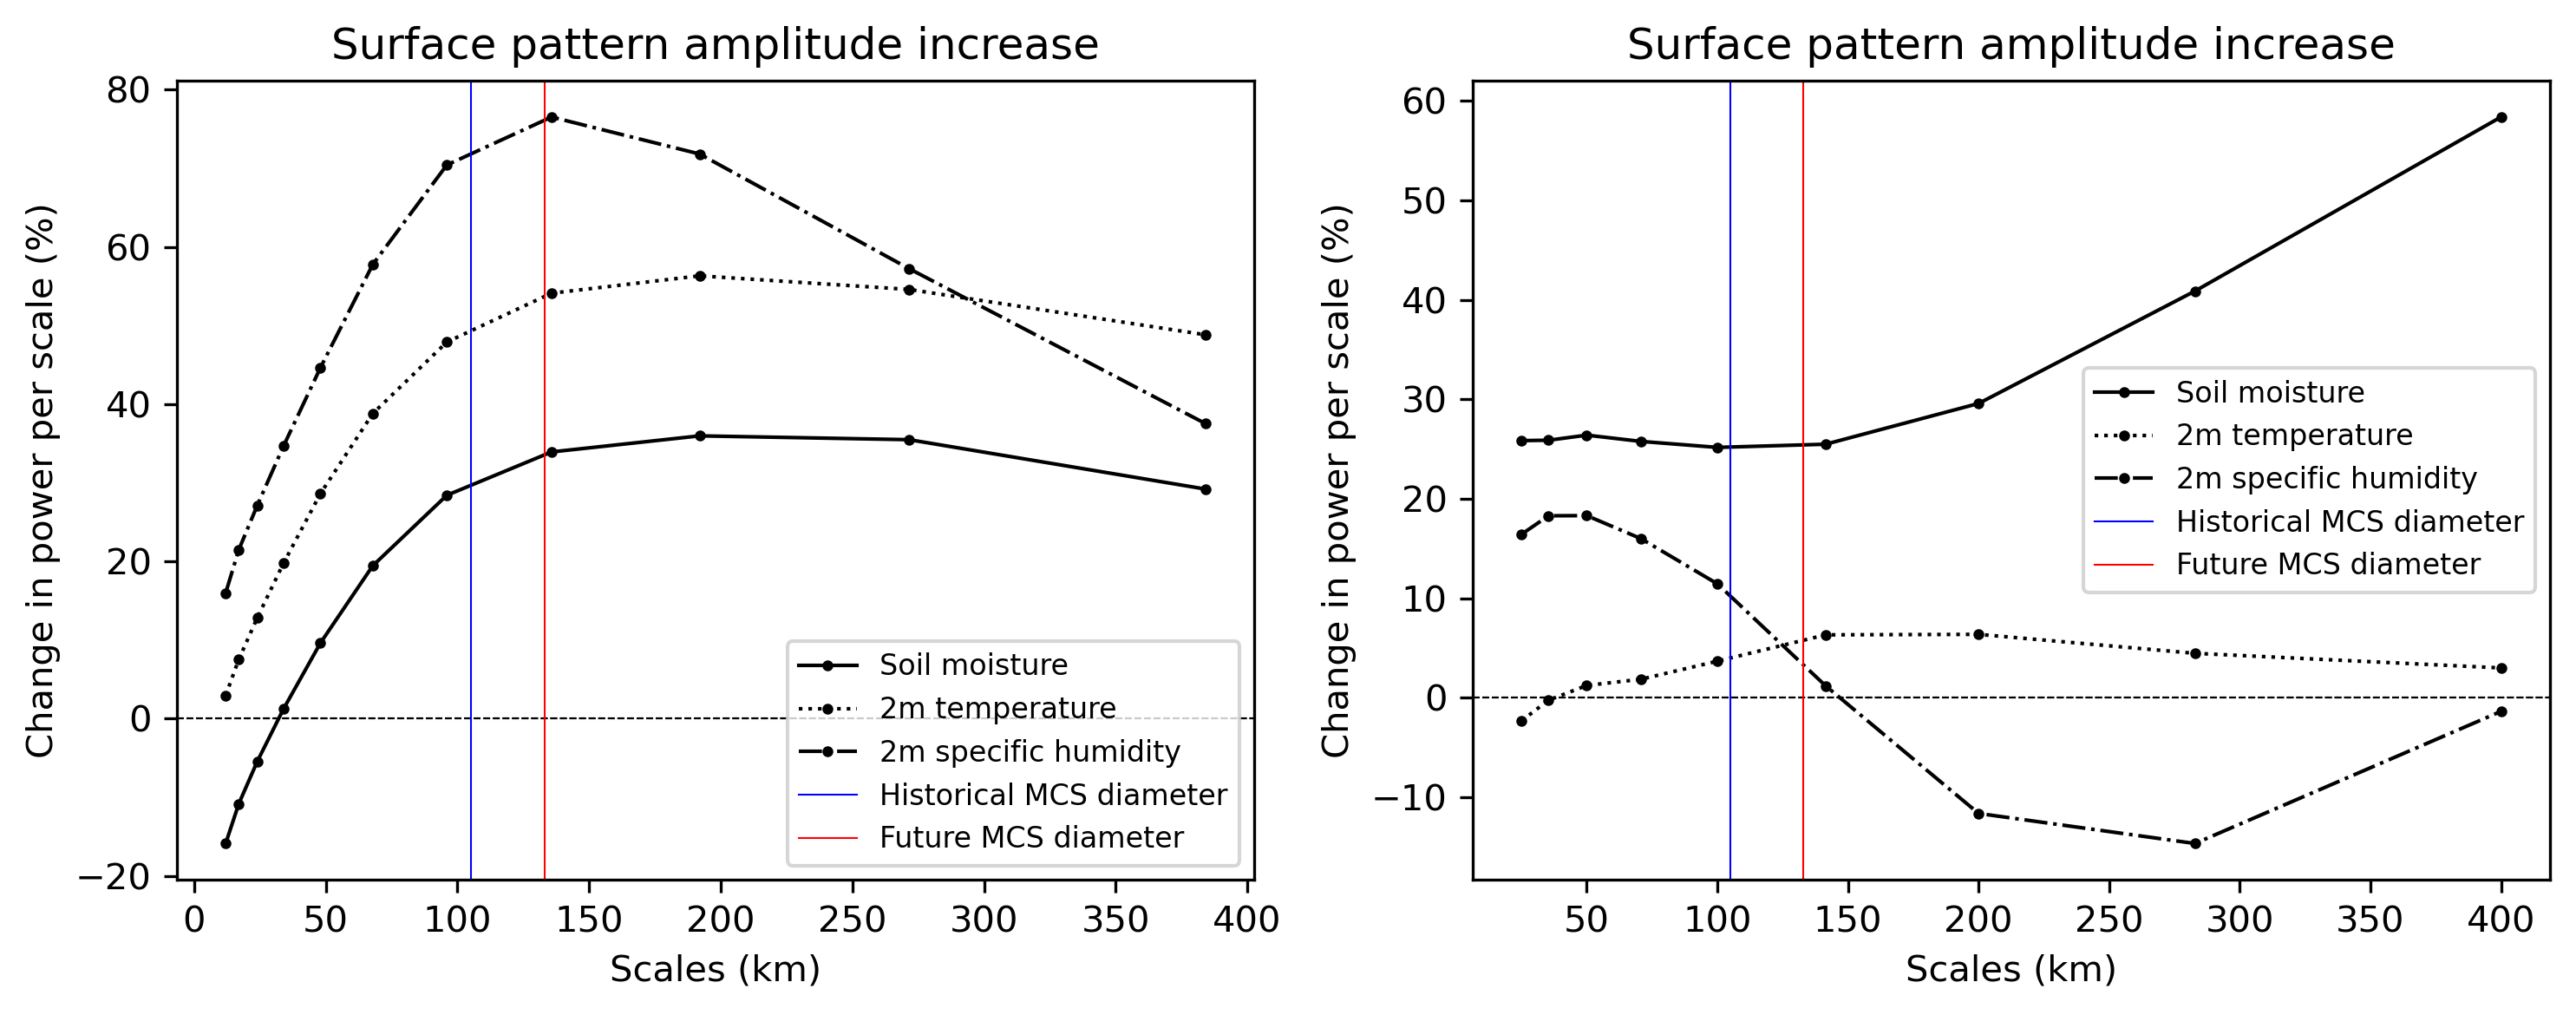

In [128]:
normtag = 'none'

f=plt.figure(figsize=(10,4), dpi=300)

ax = f.add_subplot(121) 

for vart in [('SM','solid','Soil moisture'),('t2','dotted', '2m temperature'), ('q2','dashdot', '2m specific humidity')]:#, ('tcwv','')]:  ('lh','dashed','Latent Heat Flux'
    h = 17
    var=vart[0]
    tag = ''
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_both_'+normtag+'_17N_south.p')[0], 'rb'))
    if var == 'sh':
        mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_negOnly_17N_south.p')[0], 'rb'))
    
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)

    ax.plot(scales, ((fut-hist)/hist)*100, marker='o', color='k', linestyle=vart[1], linewidth=1, markersize=2, label=vart[2])
    ax.axhline(0, linestyle='dashed', color='k', linewidth=0.5)

ax.axvline(105, linestyle='solid', color='b', linewidth=0.5, label='Historical MCS diameter')
ax.axvline(133, linestyle='solid', color='r', linewidth=0.5, label='Future MCS diameter')

ax.legend(fontsize=8)

ax.set_title('Surface pattern amplitude increase')

ax.set_xlabel('Scales (km)')
ax.set_ylabel('Change in power per scale (%)')

ax = f.add_subplot(122) 

for vart in [('SM','solid','Soil moisture') ,('t2','dotted', '2m temperature'), ('q2','dashdot', '2m specific humidity')]:#, ('tcwv','')]: ('lh','dashed','Latent Heat Flux')
    h = 17
    var=vart[0]
    tag = ''
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_both_'+normtag+'_17N_P25_south.p')[0], 'rb'))
    if var == 'sh':
        mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_negOnly_17N_P25_south.p')[0], 'rb'))
    
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)

    ax.plot(scales, ((fut-hist)/hist)*100, marker='o', color='k', linestyle=vart[1], linewidth=1, markersize=2, label=vart[2])
    ax.axhline(0, linestyle='dashed', color='k', linewidth=0.5)

ax.axvline(105, linestyle='solid', color='b', linewidth=0.5, label='Historical MCS diameter')
ax.axvline(133, linestyle='solid', color='r', linewidth=0.5, label='Future MCS diameter')

ax.legend(fontsize=8)
ax.set_title('Surface pattern amplitude increase')

ax.set_xlabel('Scales (km)')
ax.set_ylabel('Change in power per scale (%)')


plt.tight_layout()

#f.savefig('/home/ck/DIR/cornkle/figs/LMCS/CP4_PNASstudy/fullDomain_CP4fut-CP4hist.jpg')

(60, 11)
(240, 9)


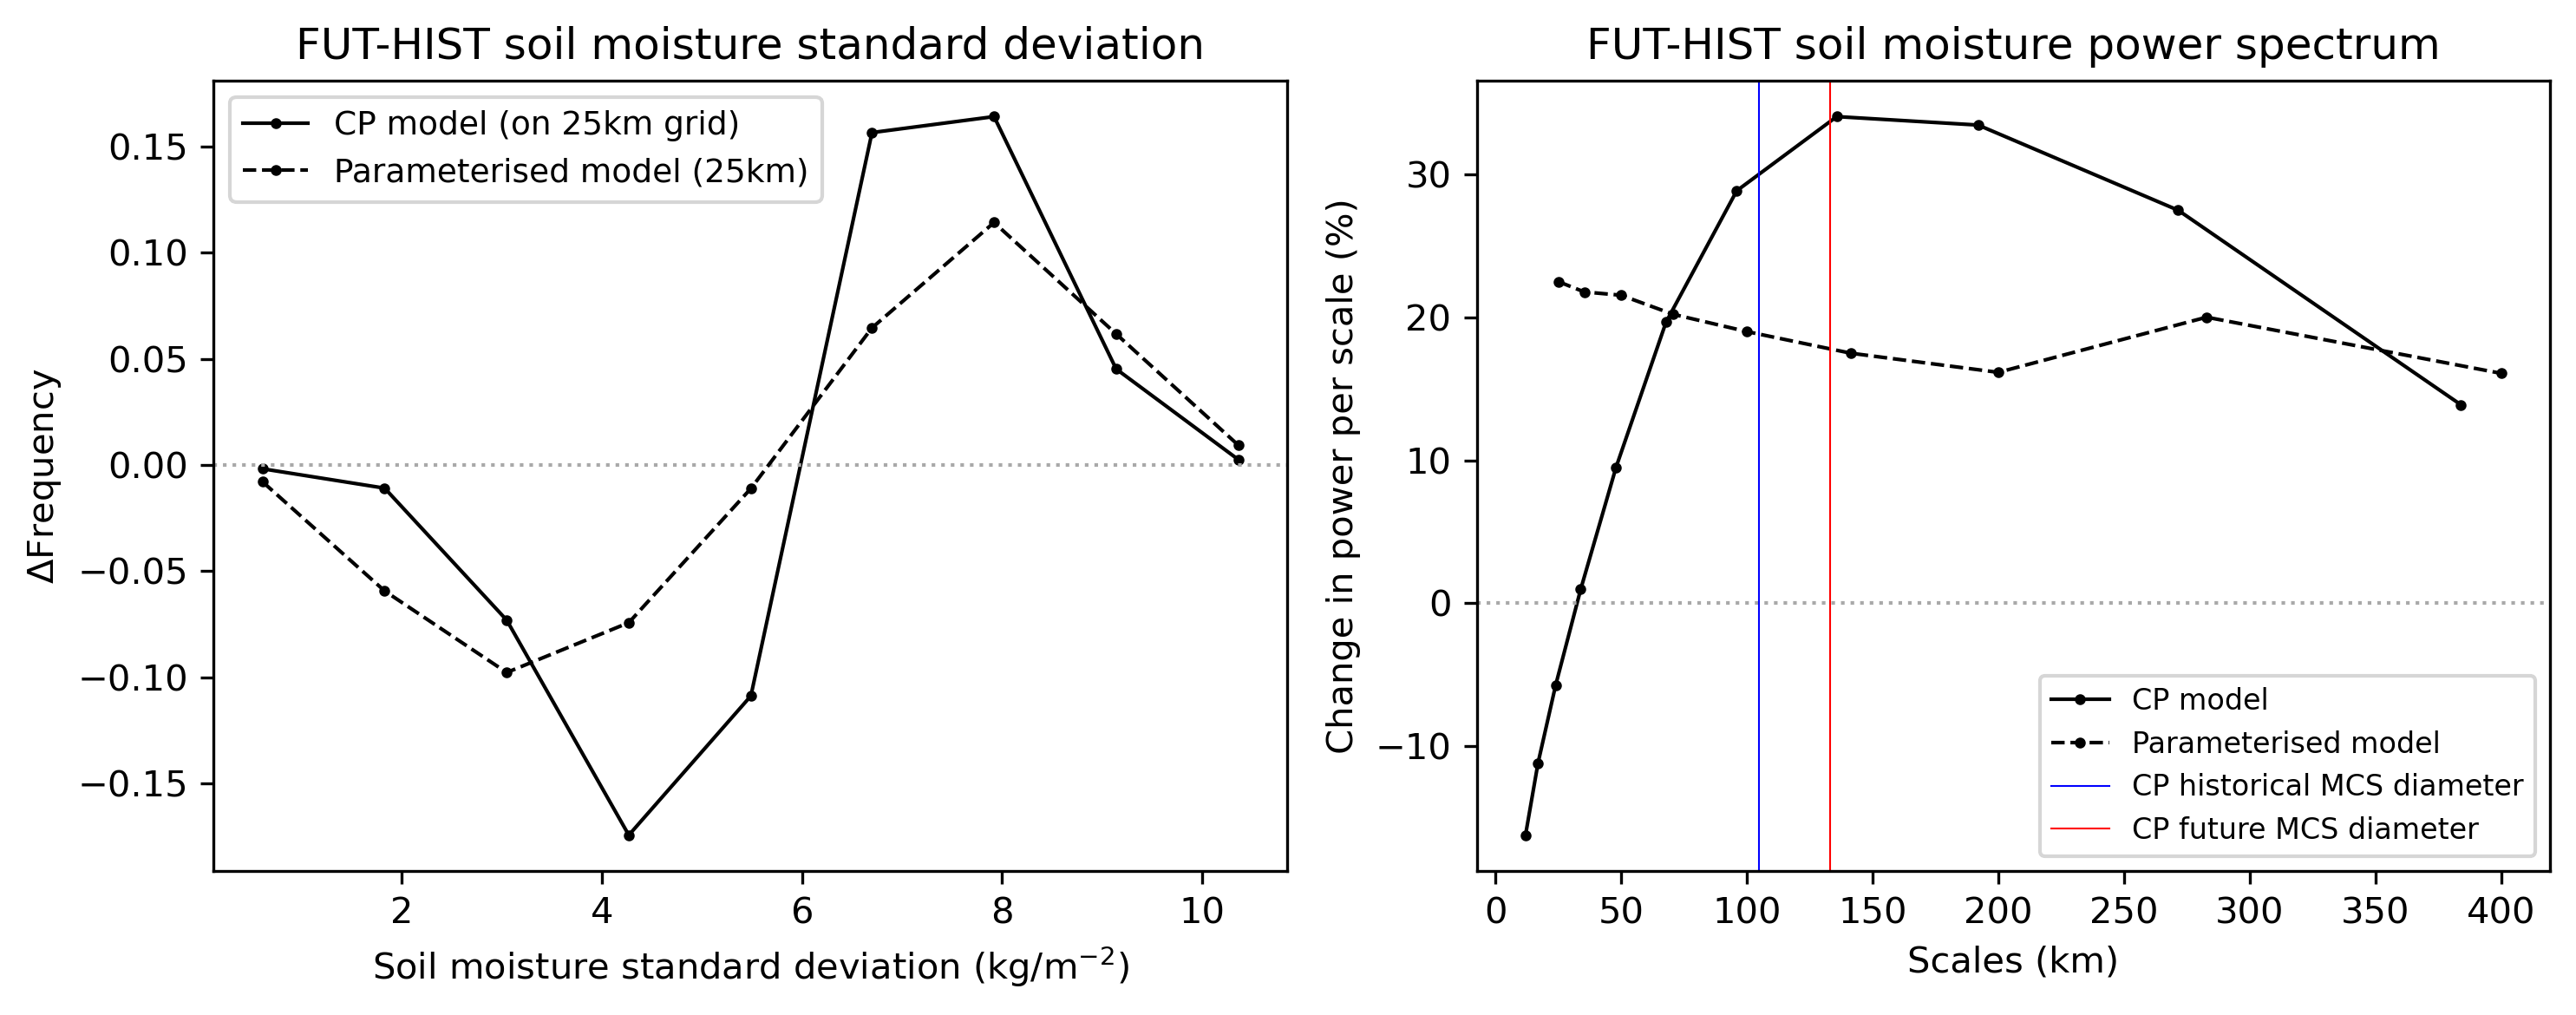

In [5]:
var = 'SM'
hour = '12'
f=plt.figure(figsize=(10,4), dpi=300)
ax = f.add_subplot(121)
mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug_CP4_on25.p')[0], 'rb'))

lhist = mean['CP4hist']
lfut = mean['CP4fut']


plow = 0
phigh = np.nanpercentile(lfut,100)

cp4 = hist2d.basic_1d_binning(lhist, np.linspace(0,phigh ,10))
cp4f = hist2d.basic_1d_binning(lfut, np.linspace(0, phigh,10))


plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb'])-cp4['nb']/np.sum(cp4['nb']), color='k', label='CP model (on 25km grid)', marker='o', markersize=2, linewidth=1)
plt.ylabel('Frequency')
plt.xlabel('SH stddev')

ax.axhline(0, linewidth=1, linestyle='dotted', color='darkgrey')

mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug_P25.p')[0], 'rb'))

lhist = mean['P25hist']
lfut = mean['P25fut']

cp4 = hist2d.basic_1d_binning(lhist, np.linspace(0, phigh,10))
cp4f = hist2d.basic_1d_binning(lfut, np.linspace(0, phigh,10))
hp = cp4['nb']/np.sum(cp4['nb'])
#
plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb'])-cp4['nb']/np.sum(cp4['nb']), color='k', label='Parameterised model (25km)', marker='o', markersize=2, linestyle='dashed', linewidth=1)
plt.ylabel('$\Delta$Frequency')
plt.xlabel('Soil moisture standard deviation (kg/m$^{-2}$)')
plt.title('FUT-HIST soil moisture standard deviation')

plt.legend(fontsize=9)
plt.tight_layout()

####################

normtag='none'
ax = f.add_subplot(122) 

for vart in [('SM','solid','Soil moisture')]: #,('t2','dotted', '2m temperature'), ('q2','dashdot', '2m specific humidity')]:#, ('tcwv','')]:  ('lh','dashed','Latent Heat Flux'
    h = 17
    var=vart[0]
    tag = ''
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_both_'+normtag+'_17N_south.p')[0], 'rb'))
    if var == 'sh':
        mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_negOnly_17N_south.p')[0], 'rb'))
    
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)

    ax.plot(scales, ((fut-hist)/hist)*100, marker='o', color='k', linestyle=vart[1], linewidth=1, markersize=2, label='CP model')
    
    #####
    
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_both_'+normtag+'_17N_P25_south.p')[0], 'rb'))
    if var == 'sh':
        mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_negOnly_17N_P25_south.p')[0], 'rb'))
    
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)

    ax.plot(scales, ((fut-hist)/hist)*100, marker='o', color='k', linewidth=1, markersize=2, linestyle='dashed', label='Parameterised model')
    
    
    ax.axhline(0, linestyle='dotted', color='darkgrey', linewidth=1)

ax.axvline(105, linestyle='solid', color='b', linewidth=0.5, label='CP historical MCS diameter')
ax.axvline(133, linestyle='solid', color='r', linewidth=0.5, label='CP future MCS diameter')

ax.legend(fontsize=8)

ax.set_title('FUT-HIST soil moisture power spectrum')

ax.set_xlabel('Scales (km)')
ax.set_ylabel('Change in power per scale (%)')

plt.tight_layout()

(60, 11)
(240, 9)


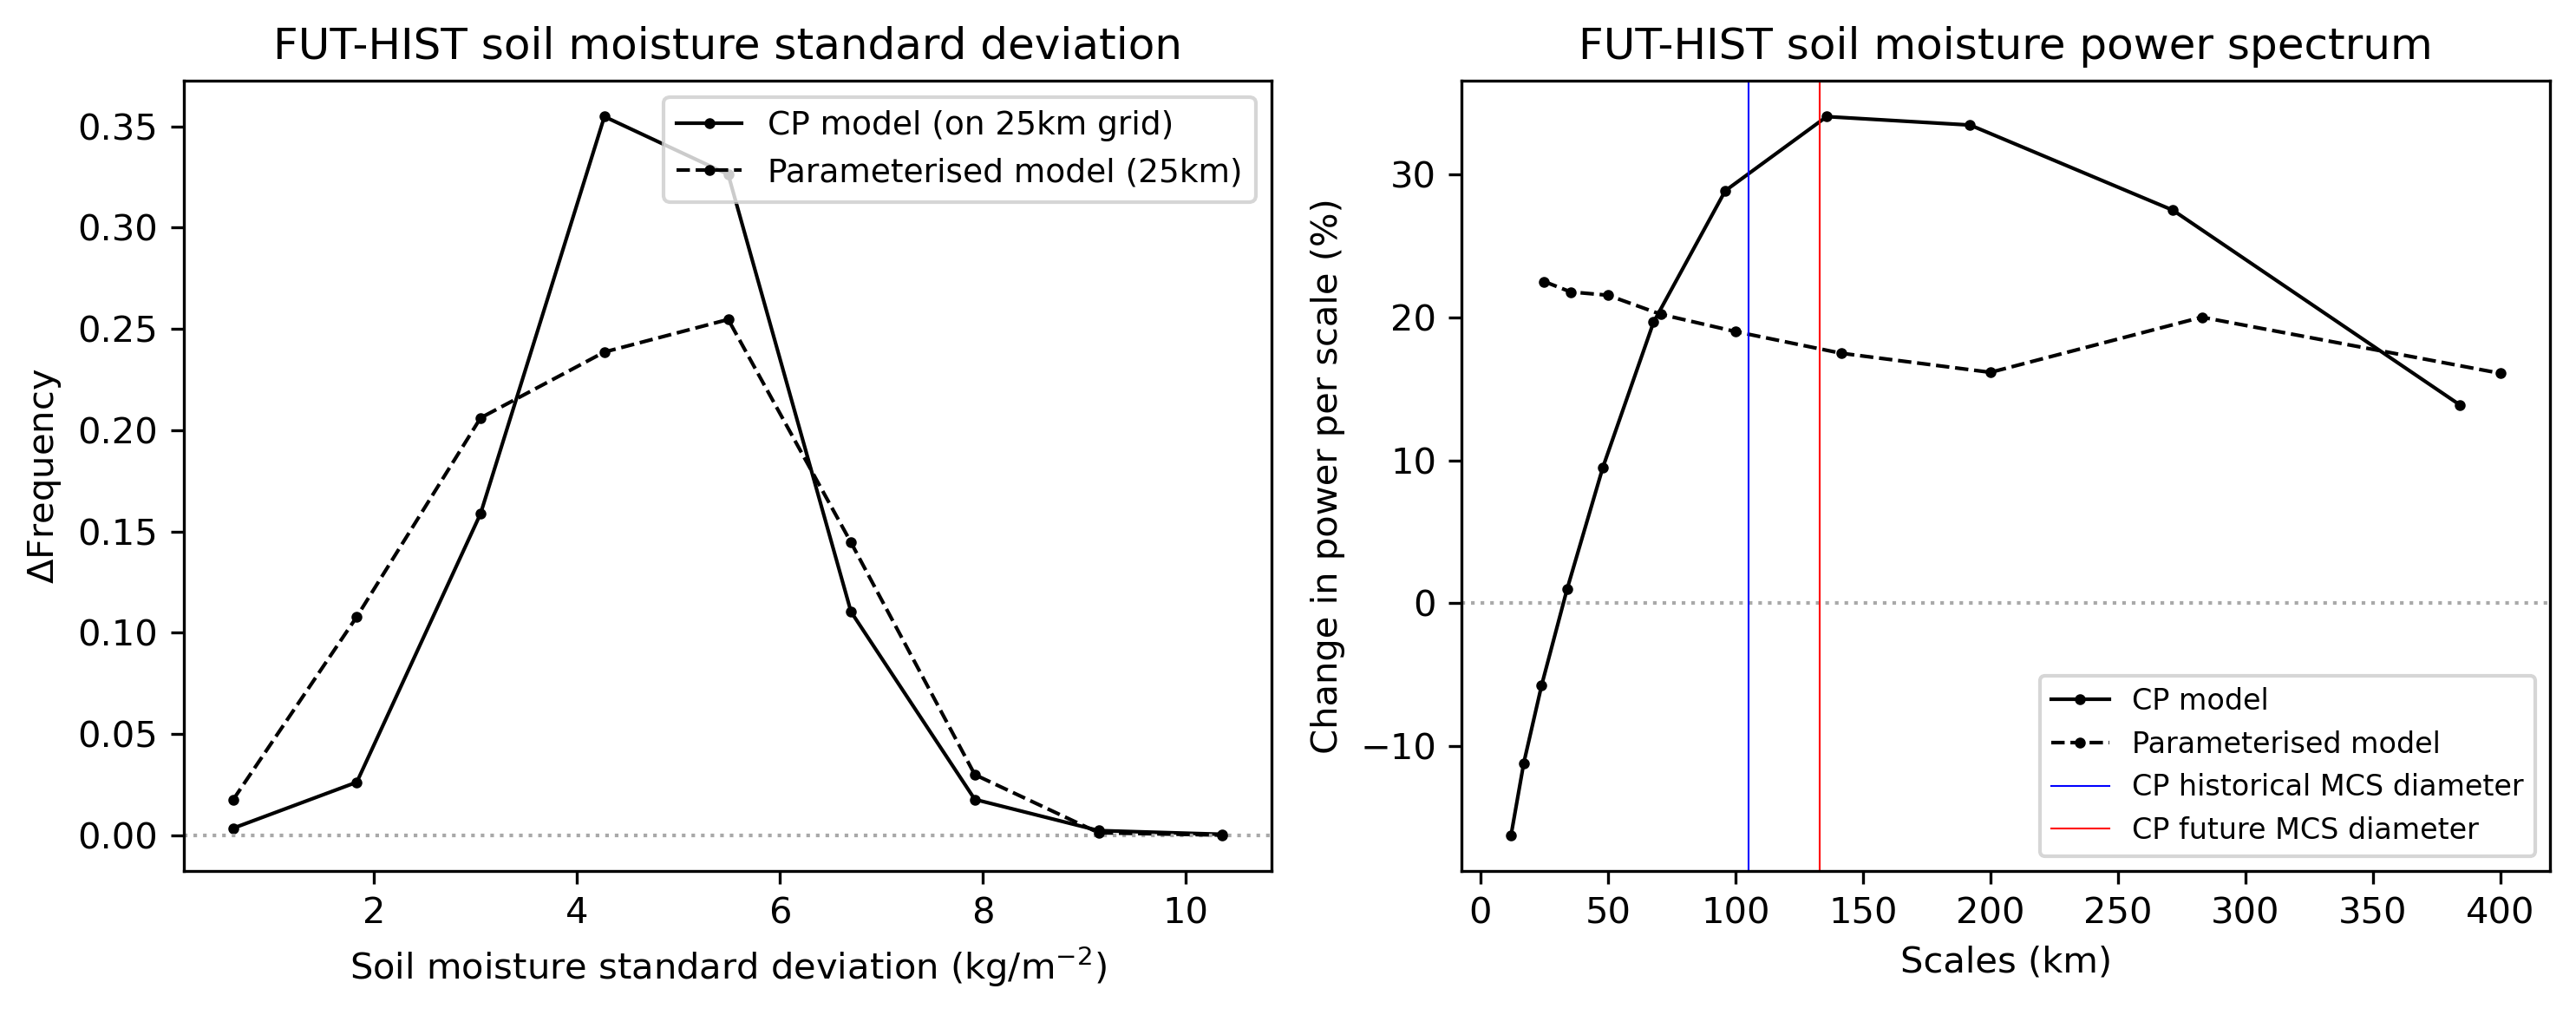

In [8]:
var = 'SM'
hour = '12'
f=plt.figure(figsize=(10,4), dpi=300)
ax = f.add_subplot(121)
mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug_CP4_on25.p')[0], 'rb'))

lhist = mean['CP4hist']

plow = 0
phigh = np.nanpercentile(lhist,100)

cp4 = hist2d.basic_1d_binning(lhist, np.linspace(0,phigh ,10))


plt.plot(cp4f['xbins'], cp4['nb']/np.sum(cp4['nb']), color='k', label='CP model (on 25km grid)', marker='o', markersize=2, linewidth=1)
plt.ylabel('Frequency')
plt.xlabel('SH stddev')

ax.axhline(0, linewidth=1, linestyle='dotted', color='darkgrey')

mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug_P25.p')[0], 'rb'))

lhist = mean['P25hist']

cp4 = hist2d.basic_1d_binning(lhist, np.linspace(0, phigh,10))

hp = cp4['nb']/np.sum(cp4['nb'])
#
plt.plot(cp4f['xbins'], cp4['nb']/np.sum(cp4['nb']), color='k', label='Parameterised model (25km)', marker='o', markersize=2, linestyle='dashed', linewidth=1)
plt.ylabel('$\Delta$Frequency')
plt.xlabel('Soil moisture standard deviation (kg/m$^{-2}$)')
plt.title('FUT-HIST soil moisture standard deviation')

plt.legend(fontsize=9)
plt.tight_layout()

####################

normtag='none'
ax = f.add_subplot(122) 

for vart in [('SM','solid','Soil moisture')]: #,('t2','dotted', '2m temperature'), ('q2','dashdot', '2m specific humidity')]:#, ('tcwv','')]:  ('lh','dashed','Latent Heat Flux'
    h = 17
    var=vart[0]
    tag = ''
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_both_'+normtag+'_17N_south.p')[0], 'rb'))
    if var == 'sh':
        mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_negOnly_17N_south.p')[0], 'rb'))
    
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)

    ax.plot(scales, ((fut-hist)/hist)*100, marker='o', color='k', linestyle=vart[1], linewidth=1, markersize=2, label='CP model')
    
    #####
    
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_both_'+normtag+'_17N_P25_south.p')[0], 'rb'))
    if var == 'sh':
        mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_negOnly_17N_P25_south.p')[0], 'rb'))
    
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)

    ax.plot(scales, ((fut-hist)/hist)*100, marker='o', color='k', linewidth=1, markersize=2, linestyle='dashed', label='Parameterised model')
    
    
    ax.axhline(0, linestyle='dotted', color='darkgrey', linewidth=1)

ax.axvline(105, linestyle='solid', color='b', linewidth=0.5, label='CP historical MCS diameter')
ax.axvline(133, linestyle='solid', color='r', linewidth=0.5, label='CP future MCS diameter')

ax.legend(fontsize=8)

ax.set_title('FUT-HIST soil moisture power spectrum')

ax.set_xlabel('Scales (km)')
ax.set_ylabel('Change in power per scale (%)')

plt.tight_layout()

(240, 9)
(180, 9)
(240, 9)
(180, 9)


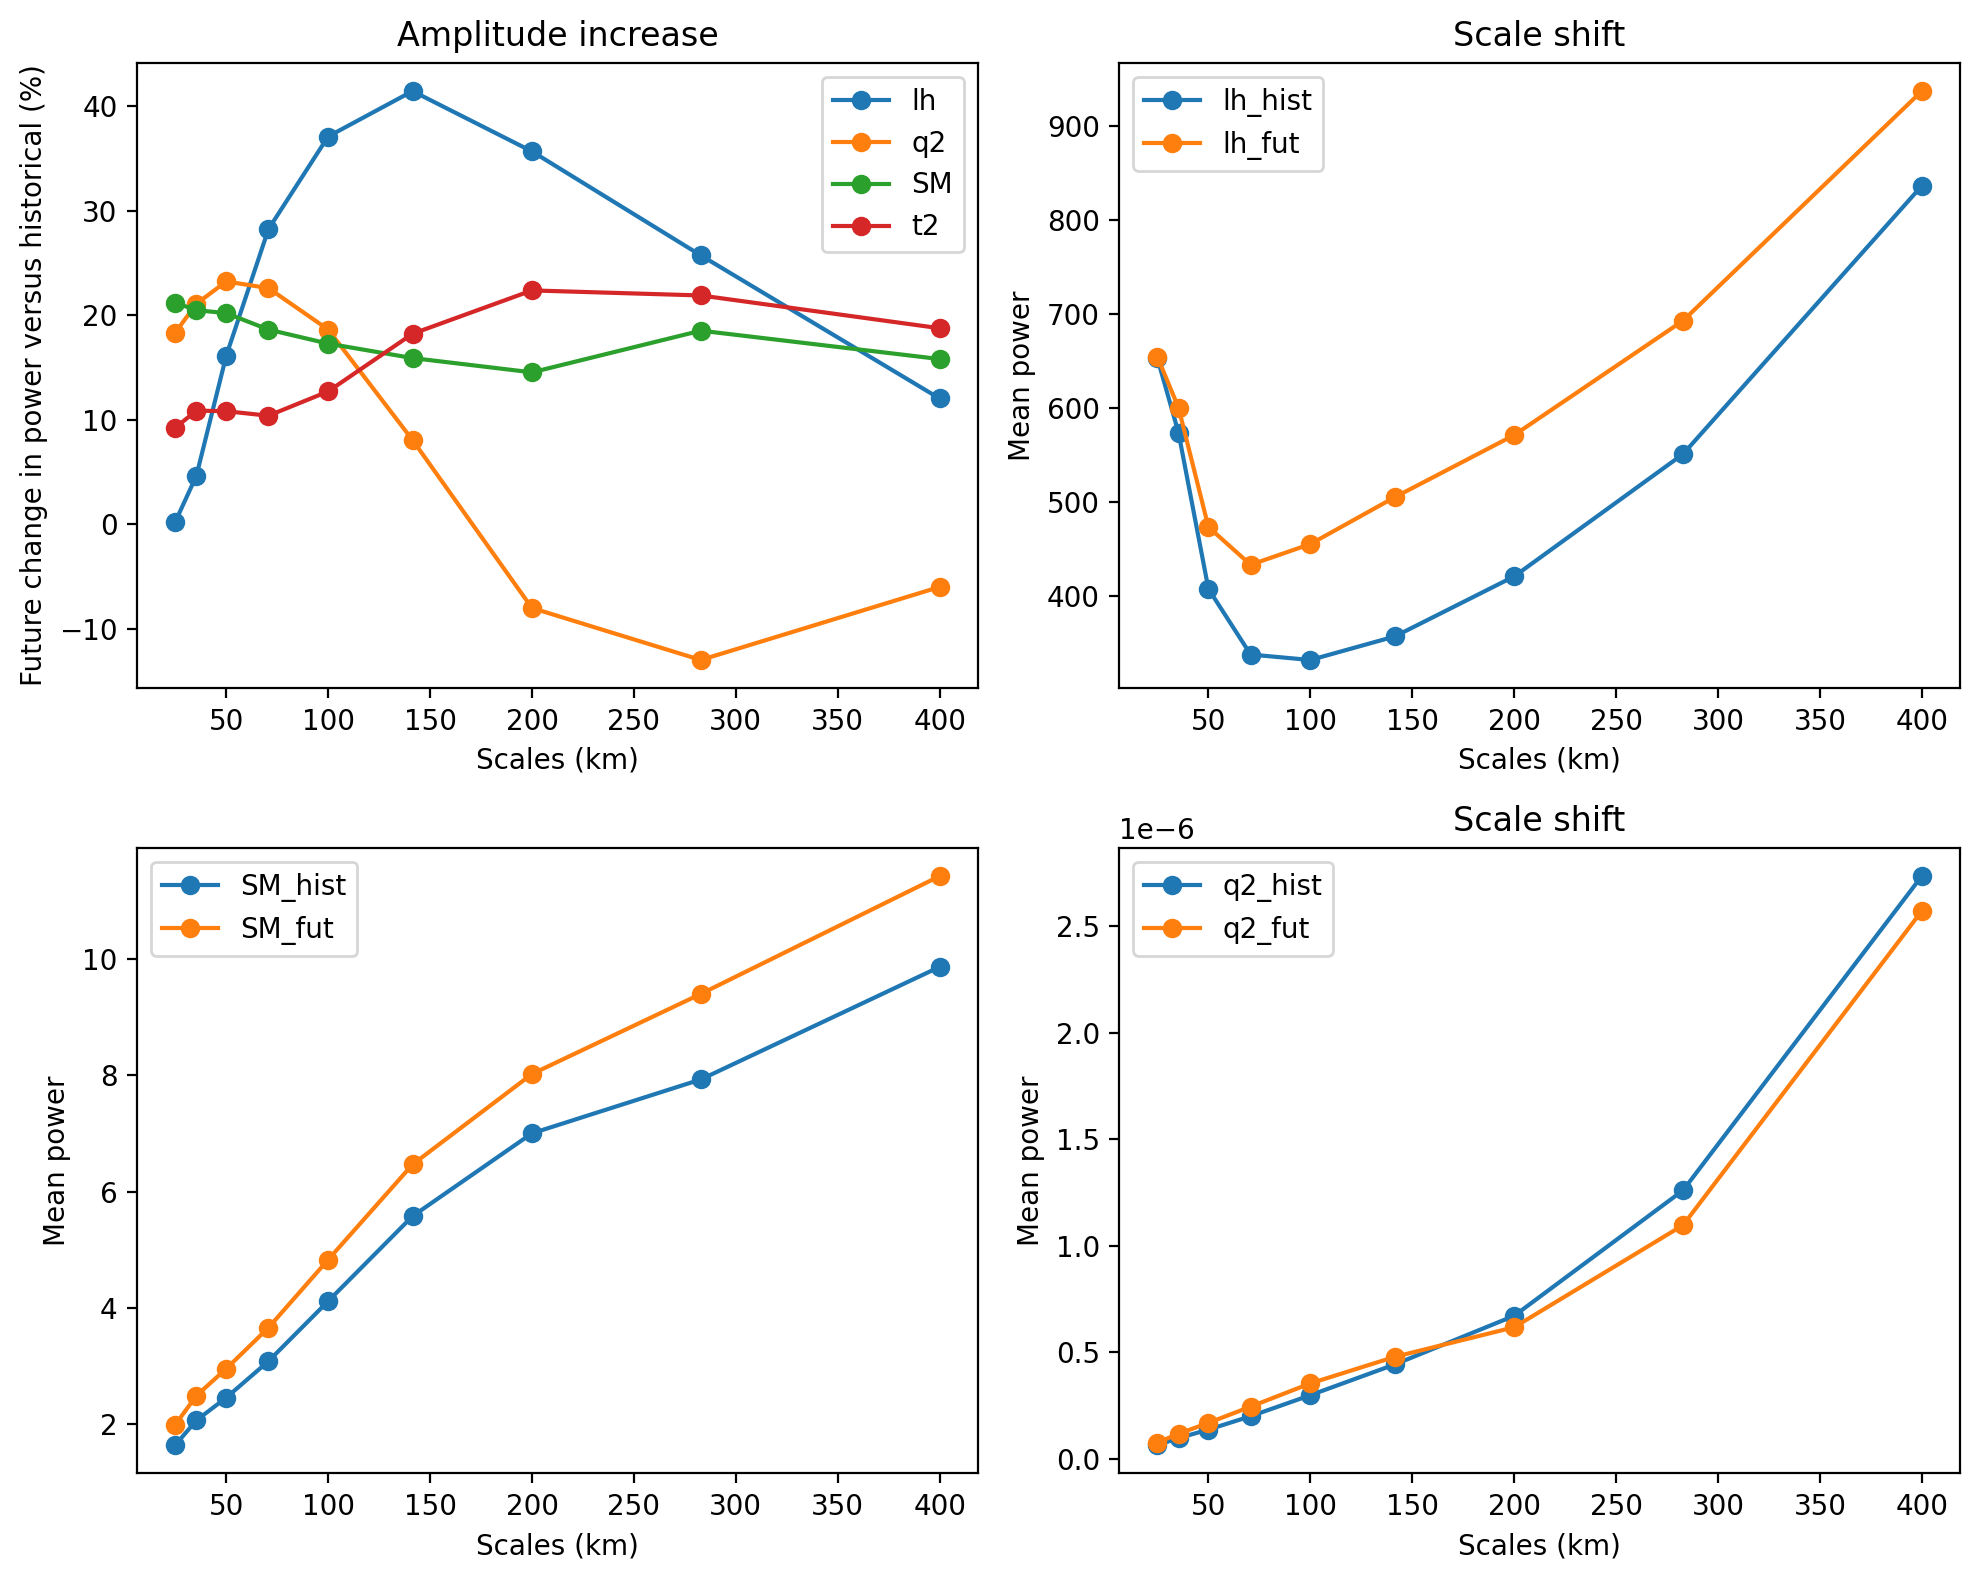

In [69]:
normtag='scale_squared'
f=plt.figure(figsize=(10,8), dpi=200)
ax = f.add_subplot(221) 
ax1 = f.add_subplot(222) 
ax2 = f.add_subplot(223)
ax3 = f.add_subplot(224)
for vart in [('lh',''), ('q2',''), ('SM',''),('t2','')]:#, ('tcwv','')]:
    h = 17
    var=vart[0]
    tag = vart[1]
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_both_'+normtag+'_17N_P25.p')[0], 'rb'))
    #ipdb.set_trace()
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)
    ax.set_title('Amplitude increase')
    ax.plot(scales, ((fut-hist)/hist)*100, label=var, marker='o')
    

    if vart[0] in ['lh']:
        ax1.plot(scales, (hist), label=var+'_hist', marker='o')
        ax1.plot(scales, (fut), label=var+'_fut', marker='o')
        ax1.set_ylabel('Mean power')
        ax1.set_title('Scale shift')
        ax1.set_xlabel('Scales (km)')
        
    if vart[0] in ['SM']:
        ax2.plot(scales, (hist), label=var+'_hist', marker='o')
        ax2.plot(scales, (fut), label=var+'_fut', marker='o')
        ax2.set_ylabel('Mean power')
        plt.title('Scale shift')
        ax2.set_xlabel('Scales (km)')
    
    if vart[0] in ['q2']:
        ax3.plot(scales, (hist), label=var+'_hist', marker='o')
        ax3.plot(scales, (fut), label=var+'_fut', marker='o')
        ax3.set_ylabel('Mean power')
        plt.title('Scale shift')
        ax3.set_xlabel('Scales (km)')
        
#     if vart[0] in ['q2']:
#         ax1.plot(scales, (hist), label=var+'_hist', marker='o')
#         ax1.plot(scales, (fut), label=var+'_fut', marker='o')
#         ax1.set_ylabel('Mean power')
#         plt.title('Scale shift')
#         ax1.set_xlabel('Scales (km)')
        
    

ax.legend()
ax1.legend()
ax2.legend()
ax3.legend()
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Future change in power versus historical (%)')
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/figs/LMCS/CP4_PNASstudy/fullDomain_CP4fut-CP4hist.jpg')

(60, 11)


Text(0, 0.5, 'Future change in power versus historical (%)')

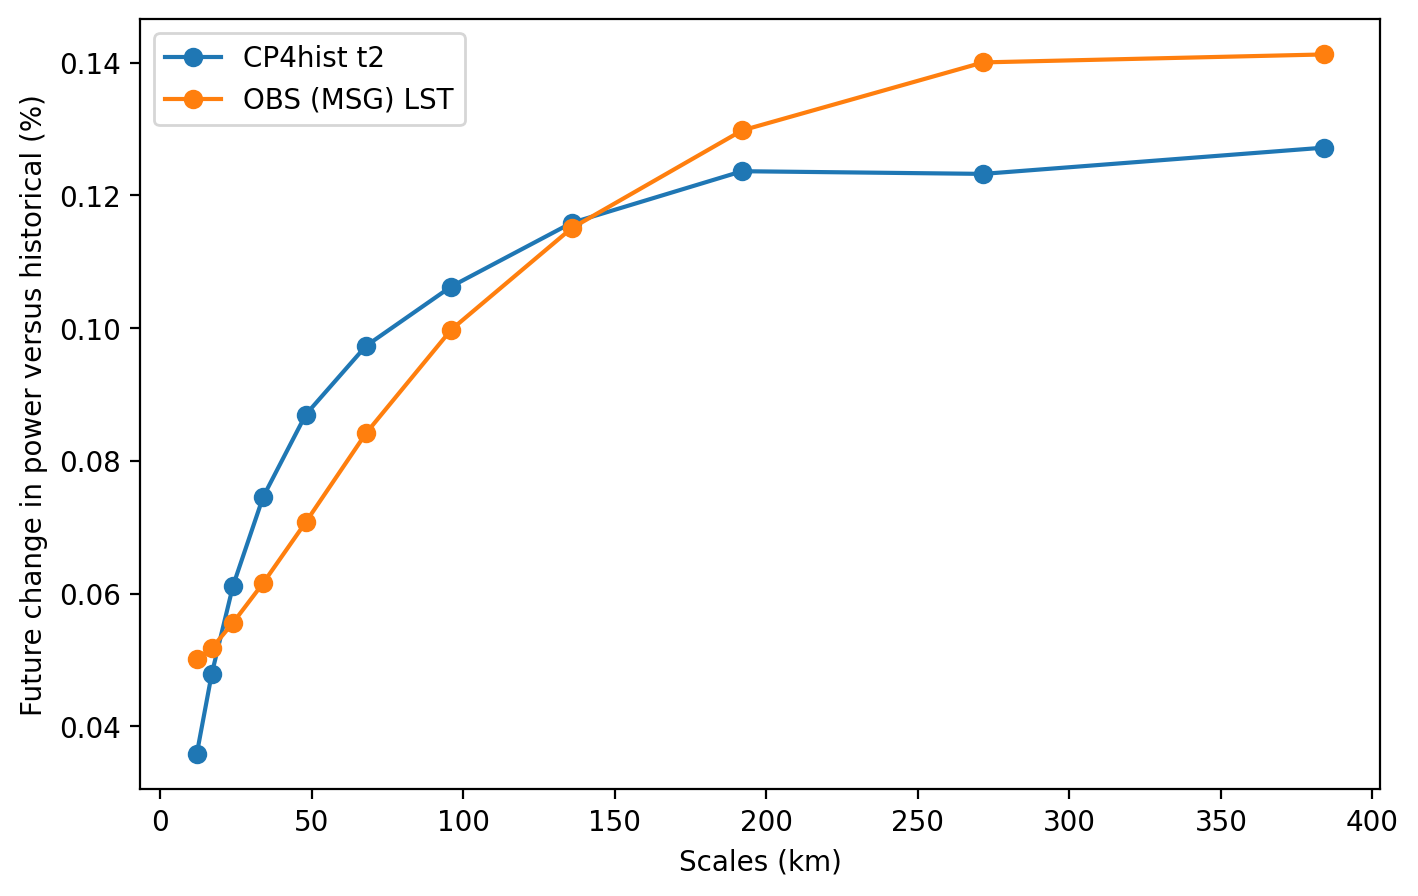

In [459]:

f=plt.figure(figsize=(8,5), dpi=200)
ax = f.add_subplot(111) 
for vart in [('t2','')]:#, ('sh',''), ('lh',''), ('tcwv','')]:
    h = 17
    var=vart[0]
    tag = vart[1]
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_posOnly.p')[0], 'rb'))
    #obs = pkl.load(open(glob.glob(basefiles + 'OBS_LSTA_power_fullDomain_'+str(h)+tag+'_negOnly.p')[0], 'rb'))
    obsp = pkl.load(open(glob.glob(basefiles + 'OBS_LSTA_power_fullDomain_'+str(h)+tag+'_posOnly.p')[0], 'rb'))
    #ipdb.set_trace()
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))
    #obss = np.array(obs['OBS']).mean(axis=0)
    obssp = np.array(obsp['OBS']).mean(axis=0)

    ax.plot(scales, hist/np.sum(hist), label='CP4hist t2', marker='o')
    #ax.plot(scales, obss/np.sum(obss), label='OBS (MSG)', marker='o')
    ax.plot(scales, obssp/np.sum(obssp), label='OBS (MSG) LST', marker='o')
    

ax.legend()
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Future change in power versus historical (%)')

(60, 11)


Text(0, 0.5, 'Future change in power versus historical (%)')

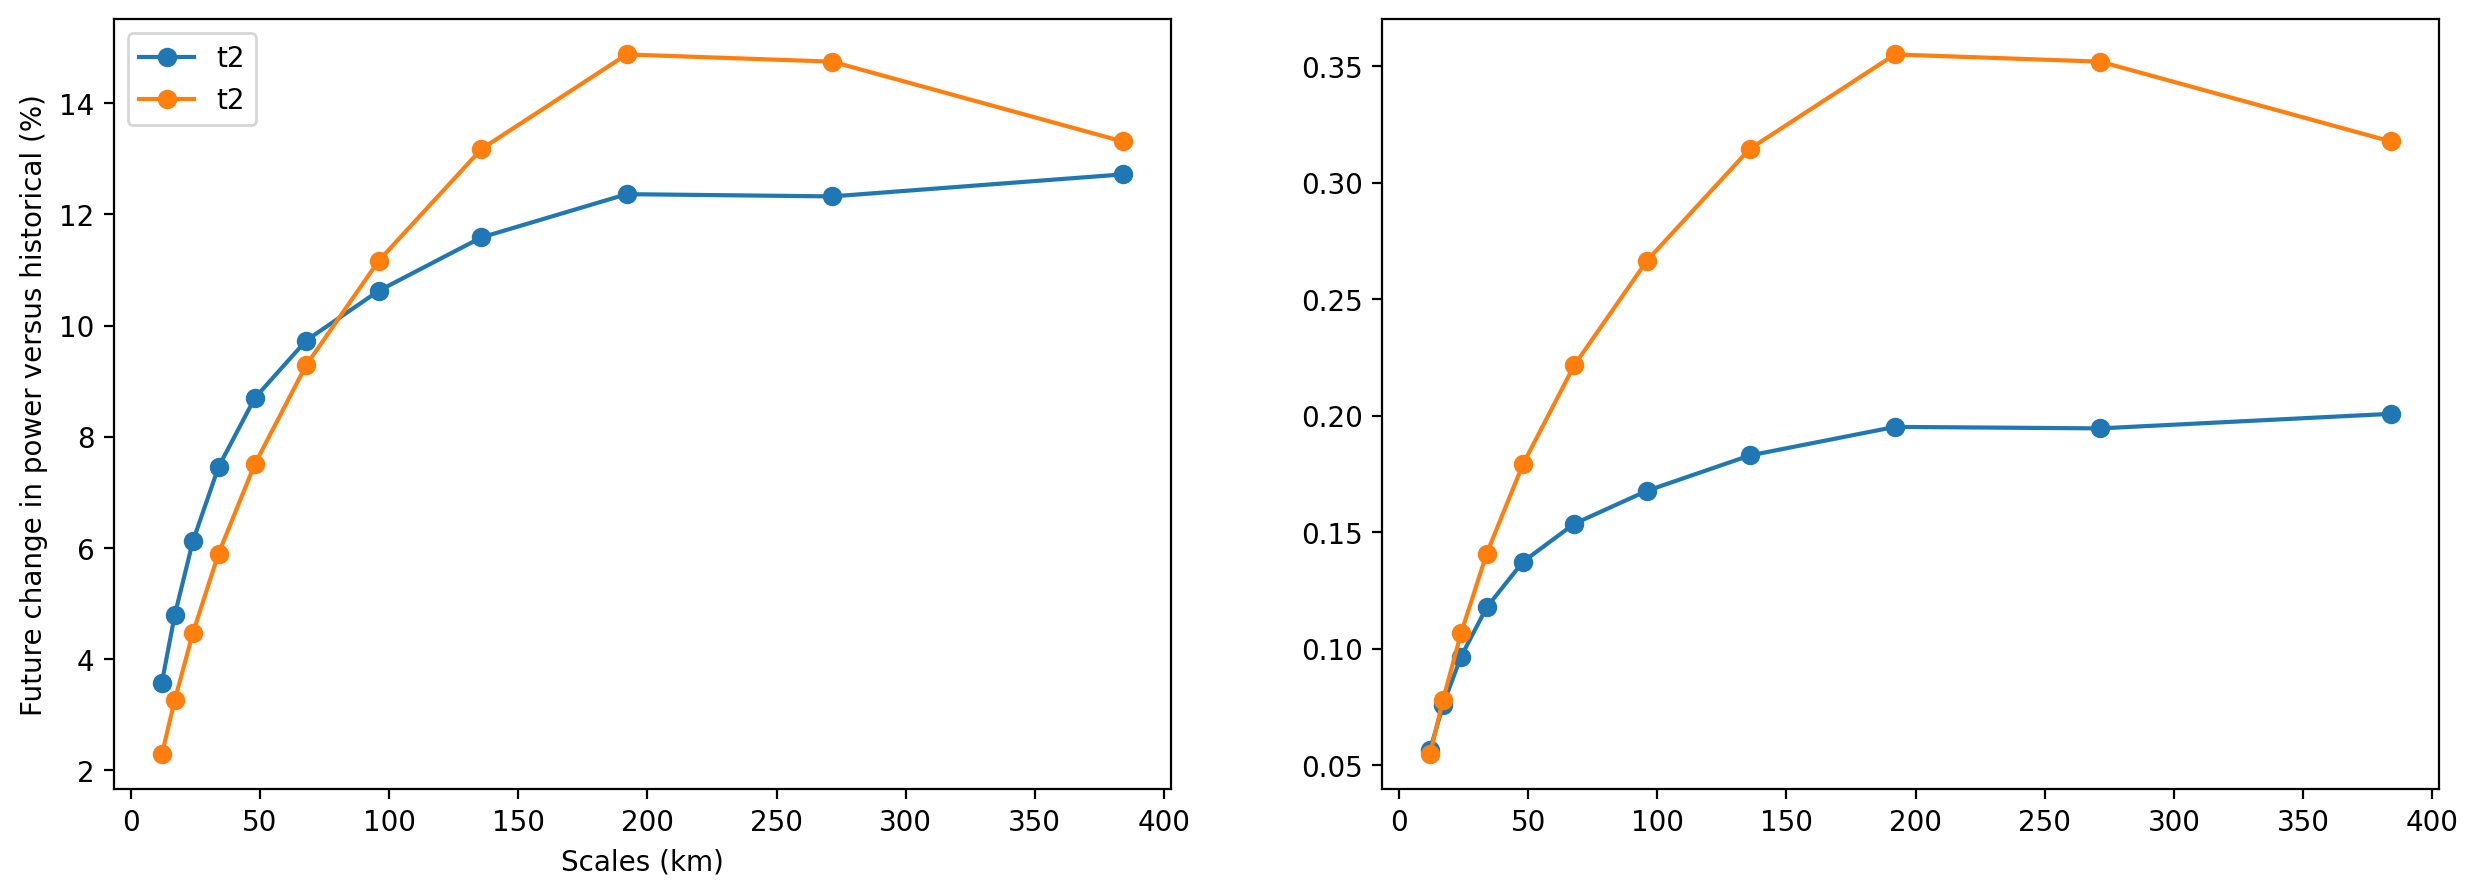

In [464]:
var = 't2'
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
for vart in [('t2','')]:
    h = 17
    var=vart[0]
    tag = vart[1]
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_posOnly.p')[0], 'rb'))
    #ipdb.set_trace()
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)

    ax.plot(scales, (hist)/np.sum(hist)*100, label=var, marker='o')
    ax.plot(scales, (fut)/np.sum(fut)*100, label=var, marker='o')
    
    if vart[0] == 't2':
        ax1 = f.add_subplot(122) 
        plt.plot(scales, (hist), label=var, marker='o')
        plt.plot(scales, (fut), label=var, marker='o')

ax.legend()
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Future change in power versus historical (%)')

(60, 11)


Text(0, 0.5, 'Future change in power versus historical (%)')

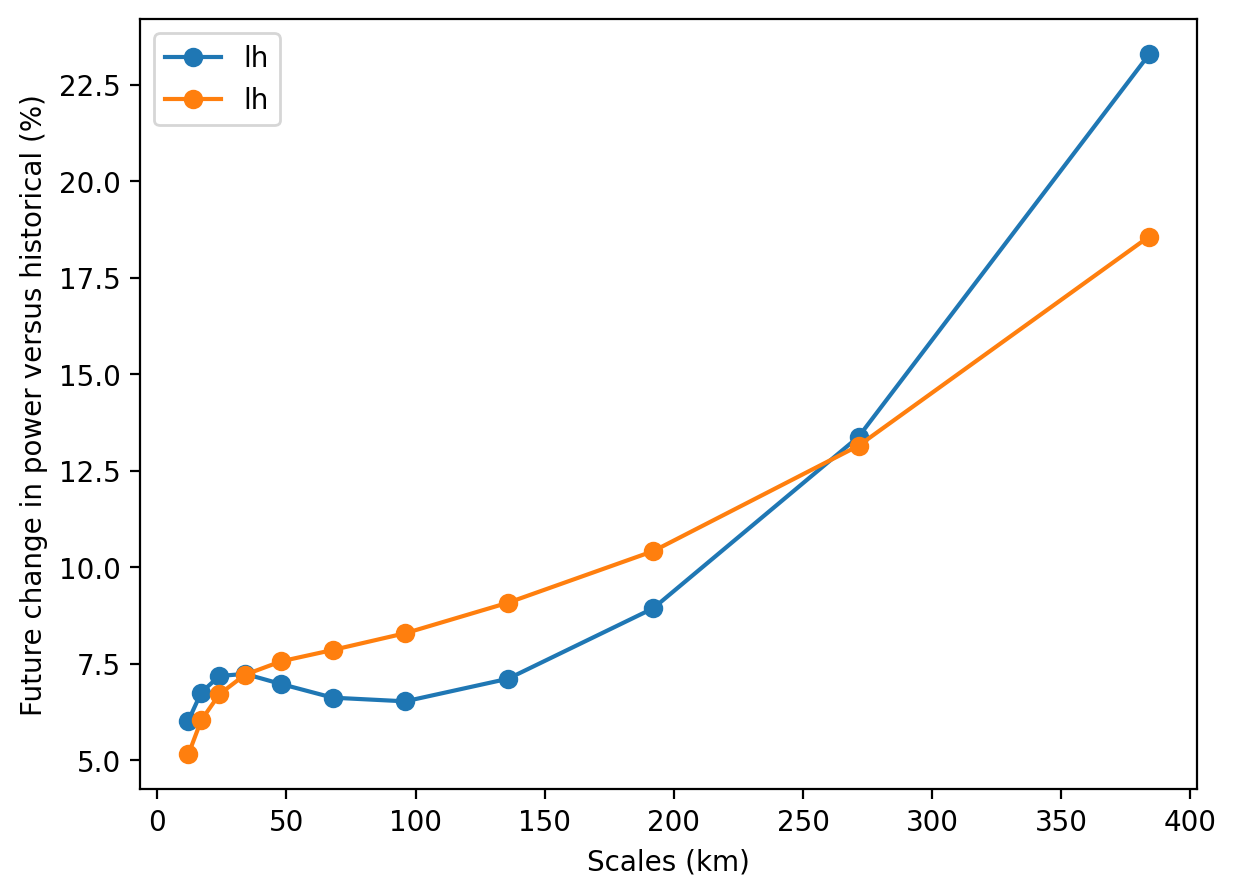

In [471]:
var = 'sh'
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
for vart in [('lh','')]:
    h = 17
    var=vart[0]
    tag = vart[1]
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_posOnly.p')[0], 'rb'))
    #ipdb.set_trace()
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)

    ax.plot(scales, (hist)/np.sum(hist)*100, label=var, marker='o')
    ax.plot(scales, (fut)/np.sum(fut)*100, label=var, marker='o')
    
    if vart[0] == 't2':
        ax1 = f.add_subplot(122) 
        plt.plot(scales, (hist), label=var, marker='o')
        plt.plot(scales, (fut), label=var, marker='o')

ax.legend()
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Future change in power versus historical (%)')

(198, 592)


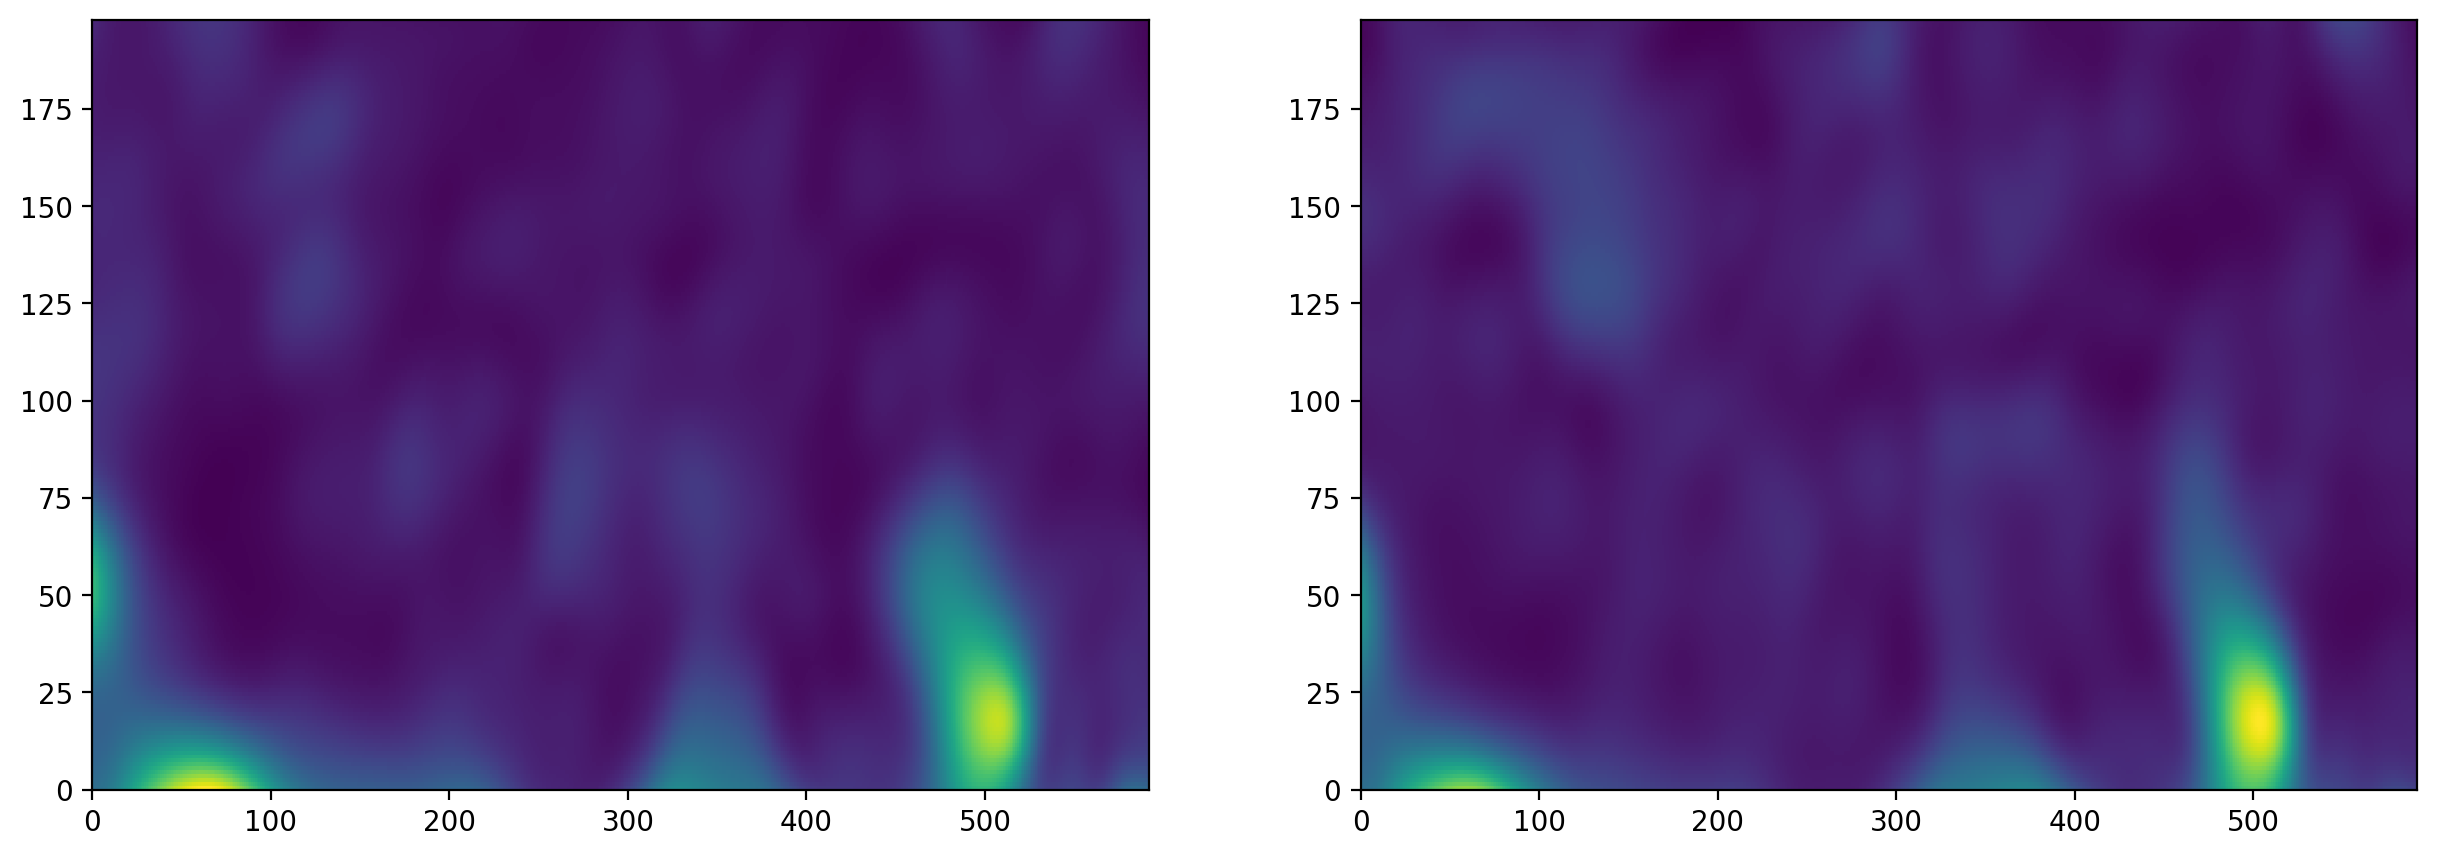

In [42]:
h = 17
var='t2'
tag=''
   
mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'.p')[0], 'rb'))
hist = np.array(mean['CP4hist'])[0:30,-4:-1,:,:]
hist = hist.mean(axis=(0,1))#sum(axis=0).sum(axis=1)
fut = np.array(mean['CP4fut'])[0:30,-4:-1,:,:]
fut = fut.mean(axis=(0,1))#.sum(axis=0).sum(axis=1)

scales = np.array(mean['scales'])
shapes = hist.shape
print(shapes)

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.pcolormesh(hist, label='hist')

ax = f.add_subplot(122) 
plt.pcolormesh(fut, label='hist')



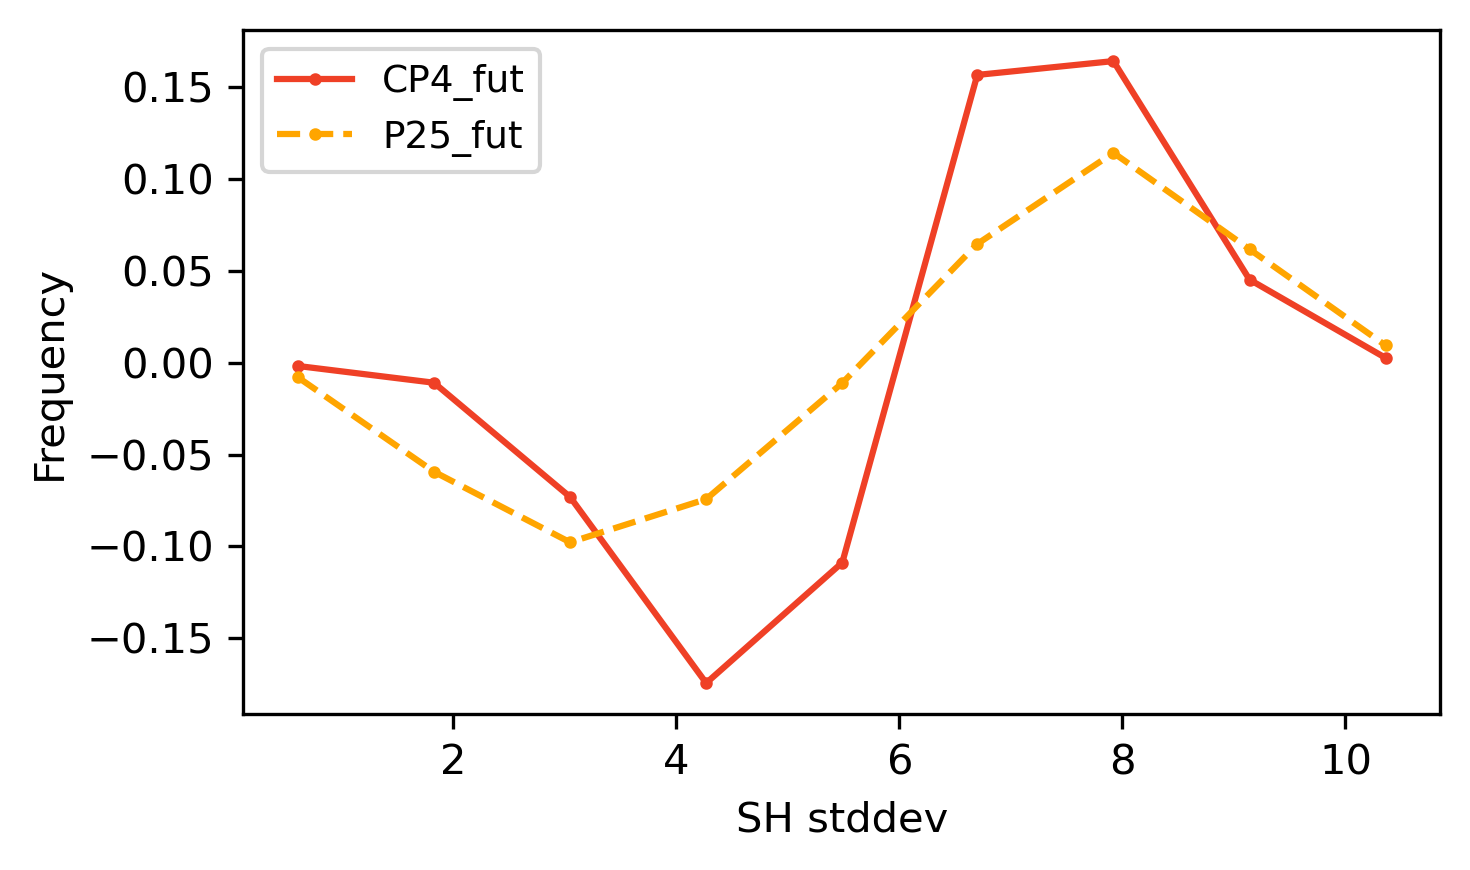

In [117]:
var = 'SM'
hour = '12'
f=plt.figure(figsize=(5,3), dpi=300)
ax = f.add_subplot(111)
mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug_CP4_on25.p')[0], 'rb'))

lhist = mean['CP4hist']
lfut = mean['CP4fut']

#ipdb.set_trace()
plow = 0
phigh = np.nanpercentile(lfut,100)

cp4 = hist2d.basic_1d_binning(lhist, np.linspace(0,phigh ,10))
cp4f = hist2d.basic_1d_binning(lfut, np.linspace(0, phigh,10))

#plt.plot(cp4['xbins'], , color='xkcd:blue', label='CP4_hist', marker='o', markersize=2)
plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb'])-cp4['nb']/np.sum(cp4['nb']), color='xkcd:tomato', label='CP4_fut', marker='o', markersize=2)
plt.ylabel('Frequency')
plt.xlabel('SH stddev')

mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug_P25.p')[0], 'rb'))

lhist = mean['P25hist']
lfut = mean['P25fut']

cp4 = hist2d.basic_1d_binning(lhist, np.linspace(0, phigh,10))
cp4f = hist2d.basic_1d_binning(lfut, np.linspace(0, phigh,10))
hp = cp4['nb']/np.sum(cp4['nb'])
# hp[1] = hp[1]-0.1
# fp = cp4f['nb']/np.sum(cp4f['nb'])
# fp[1] = fp[1]-0.1
#plt.plot(cp4['xbins'], cp4['nb']/np.sum(cp4['nb']), color='lightblue', label='P25_hist', marker='o', markersize=2, linestyle='dashed')
plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb'])-cp4['nb']/np.sum(cp4['nb']), color='orange', label='P25_fut', marker='o', markersize=2, linestyle='dashed')
plt.ylabel('Frequency')
plt.xlabel('SH stddev')
#plt.title('925 hPa temperature | $\Delta$='+str(np.round(np.nanpercentile(lfut[var],75)-np.nanpercentile(lhist[var],75),2)))
# ax.axvline(np.nanpercentile(lhist[var],75), color='b', linestyle='dashed', linewidth=0.5)
# ax.axvline(np.nanpercentile(lfut[var],75), color='r', linestyle='dashed', linewidth=0.5)
plt.legend(fontsize=9)
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/figs/LMCS/CP4_PNASstudy/SH_stddev.jpg')

# var = 'lh'
# hour = '12'
# ax = f.add_subplot(212)
# mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug.p')[0], 'rb'))

# lhist = mean['CP4hist']
# lfut = mean['CP4fut']

# cp4 = hist2d.basic_1d_binning(lhist, np.linspace(np.min(lhist), np.max(lfut),10))
# cp4f = hist2d.basic_1d_binning(lfut, np.linspace(np.min(lhist), np.max(lfut),10))
# plt.plot(cp4['xbins'], cp4['nb']/np.sum(cp4['nb']), color='xkcd:blue', label='CP4_hist', marker='o', markersize=2)
# plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb']), color='xkcd:tomato', label='CP4_fut', marker='o', markersize=2)
# plt.ylabel('Frequency')
# plt.xlabel('LH stddev')
# #plt.title('925 hPa temperature | $\Delta$='+str(np.round(np.nanpercentile(lfut[var],75)-np.nanpercentile(lhist[var],75),2)))
# # ax.axvline(np.nanpercentile(lhist[var],75), color='b', linestyle='dashed', linewidth=0.5)
# # ax.axvline(np.nanpercentile(lfut[var],75), color='r', linestyle='dashed', linewidth=0.5)
# plt.legend(fontsize=9)

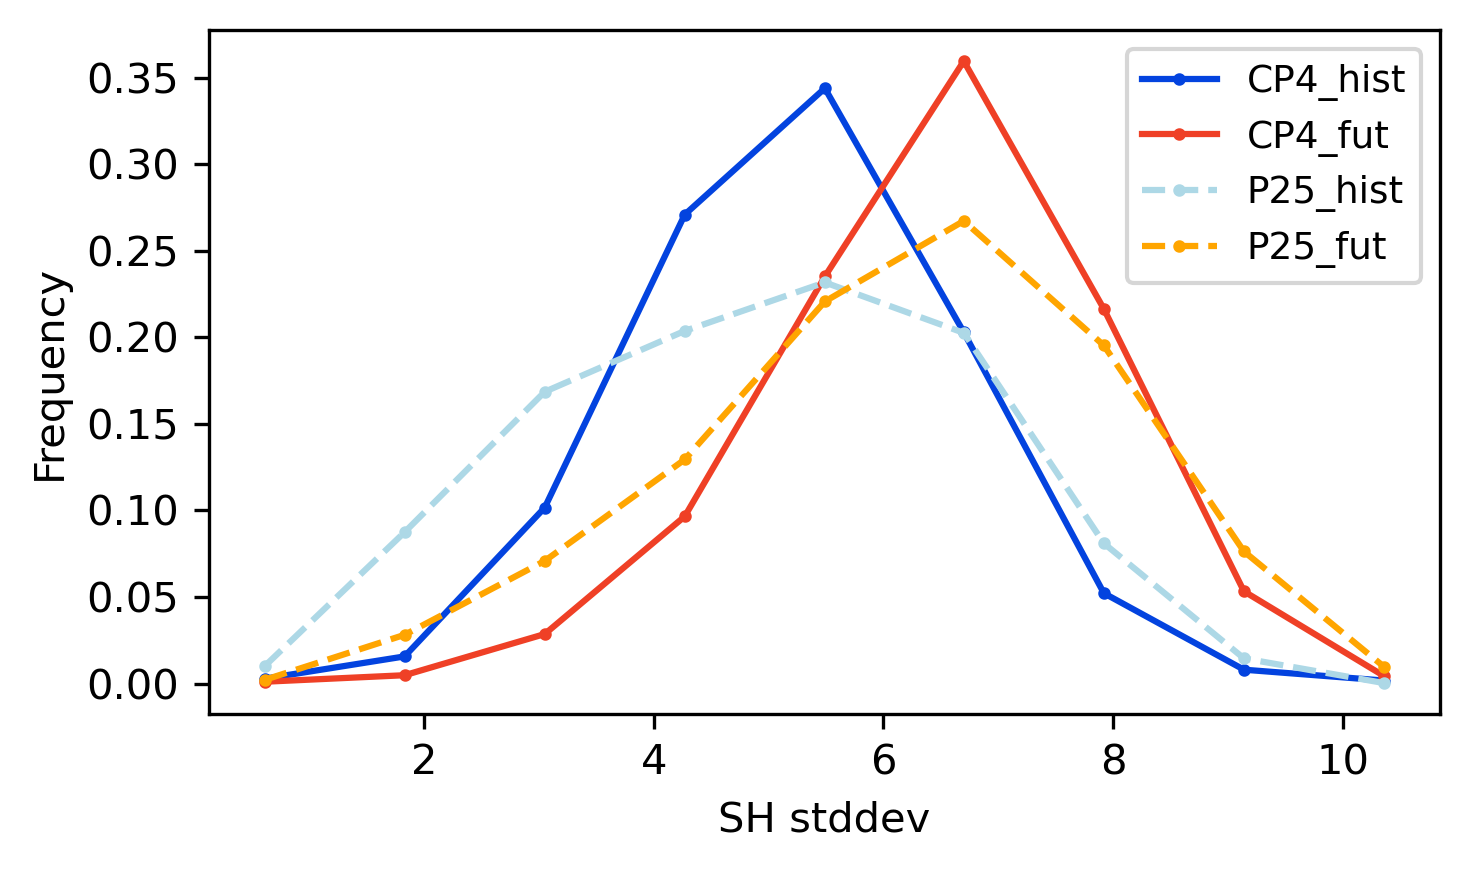

In [116]:
var = 'SM'
hour = '12'
f=plt.figure(figsize=(5,3), dpi=300)
ax = f.add_subplot(111)
mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug_CP4_on25.p')[0], 'rb'))

lhist = np.array(mean['CP4hist'])
lfut = np.array(mean['CP4fut'])

#ipdb.set_trace()
plow = 0
phigh = np.nanpercentile(lfut,100)

cp4 = hist2d.basic_1d_binning(lhist, np.linspace(0,phigh ,10))
cp4f = hist2d.basic_1d_binning(lfut, np.linspace(0, phigh,10))

plt.plot(cp4['xbins'], cp4['nb']/np.sum(cp4['nb']), color='xkcd:blue', label='CP4_hist', marker='o', markersize=2)
plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb']), color='xkcd:tomato', label='CP4_fut', marker='o', markersize=2)
plt.ylabel('Frequency')
plt.xlabel('SH stddev')


var = 'SM'
mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug_P25.p')[0], 'rb'))

lhist = np.array(mean['P25hist'])
lfut = np.array(mean['P25fut'])

cp4 = hist2d.basic_1d_binning(lhist, np.linspace(0, phigh,10))
cp4f = hist2d.basic_1d_binning(lfut, np.linspace(0, phigh,10))
hp = cp4['nb']/np.sum(cp4['nb'])
# hp[1] = hp[1]-0.1
# fp = cp4f['nb']/np.sum(cp4f['nb'])
# fp[1] = fp[1]-0.1
plt.plot(cp4['xbins'], cp4['nb']/np.sum(cp4['nb']), color='lightblue', label='P25_hist', marker='o', markersize=2, linestyle='dashed')
plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb']), color='orange', label='P25_fut', marker='o', markersize=2, linestyle='dashed')
plt.ylabel('Frequency')
plt.xlabel('SH stddev')
#plt.title('925 hPa temperature | $\Delta$='+str(np.round(np.nanpercentile(lfut[var],75)-np.nanpercentile(lhist[var],75),2)))
# ax.axvline(np.nanpercentile(lhist[var],75), color='b', linestyle='dashed', linewidth=0.5)
# ax.axvline(np.nanpercentile(lfut[var],75), color='r', linestyle='dashed', linewidth=0.5)
plt.legend(fontsize=9)
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/figs/LMCS/CP4_PNASstudy/SH_stddev.jpg')

# var = 'lh'
# hour = '12'
# ax = f.add_subplot(212)
# mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug.p')[0], 'rb'))

# lhist = mean['CP4hist']
# lfut = mean['CP4fut']

# cp4 = hist2d.basic_1d_binning(lhist, np.linspace(np.min(lhist), np.max(lfut),10))
# cp4f = hist2d.basic_1d_binning(lfut, np.linspace(np.min(lhist), np.max(lfut),10))
# plt.plot(cp4['xbins'], cp4['nb']/np.sum(cp4['nb']), color='xkcd:blue', label='CP4_hist', marker='o', markersize=2)
# plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb']), color='xkcd:tomato', label='CP4_fut', marker='o', markersize=2)
# plt.ylabel('Frequency')
# plt.xlabel('LH stddev')
# #plt.title('925 hPa temperature | $\Delta$='+str(np.round(np.nanpercentile(lfut[var],75)-np.nanpercentile(lhist[var],75),2)))
# # ax.axvline(np.nanpercentile(lhist[var],75), color='b', linestyle='dashed', linewidth=0.5)
# # ax.axvline(np.nanpercentile(lfut[var],75), color='r', linestyle='dashed', linewidth=0.5)
# plt.legend(fontsize=9)

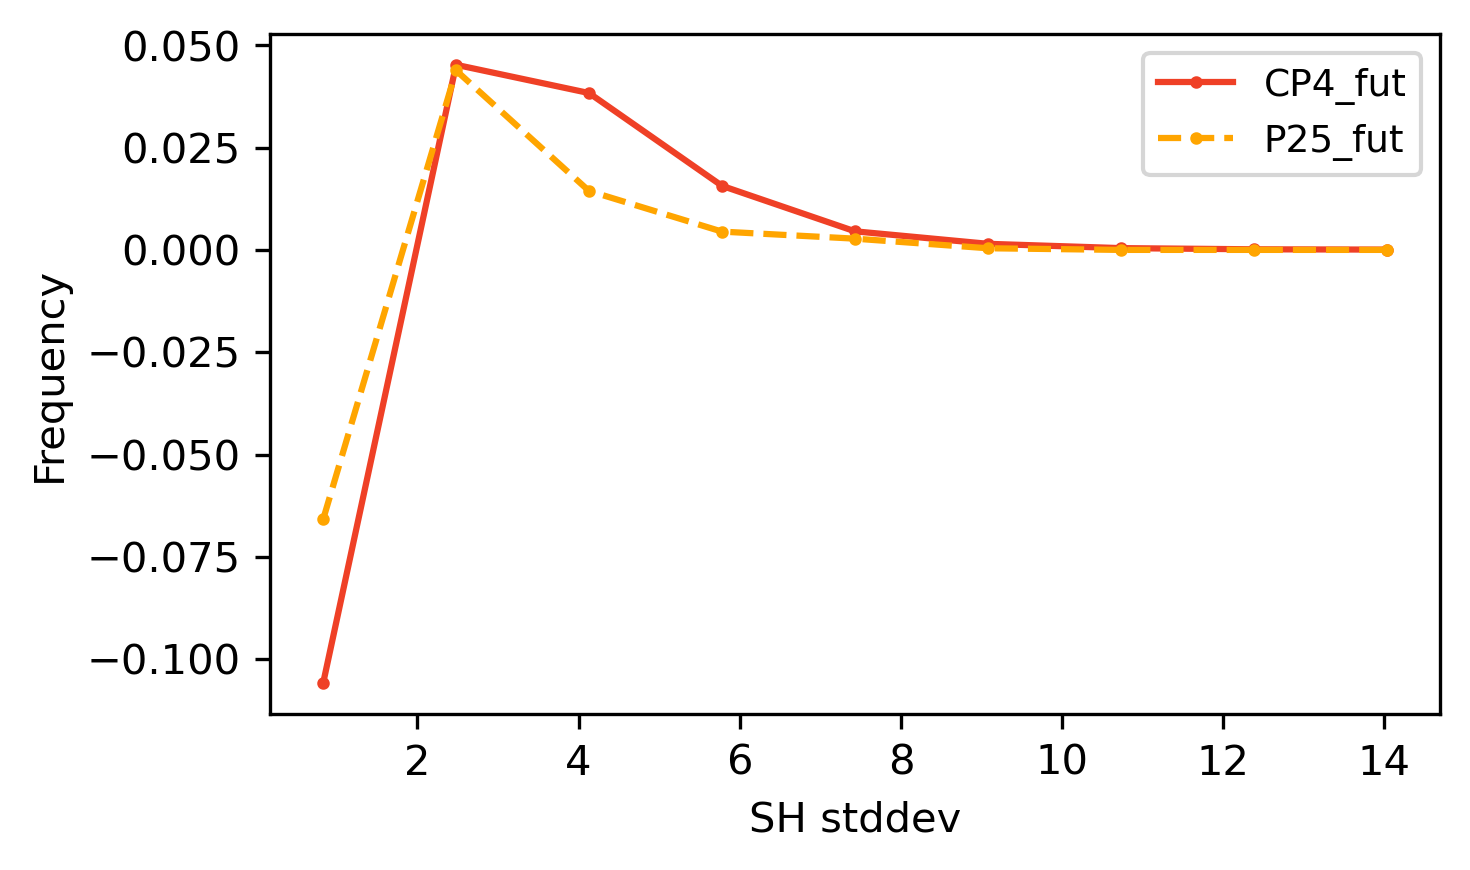

In [113]:
var = 'lsRain'
hour = '12'
f=plt.figure(figsize=(5,3), dpi=300)
ax = f.add_subplot(111)
mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug_CP4_on25.p')[0], 'rb'))

lhist = np.array(mean['CP4hist'])*3600
lfut = np.array(mean['CP4fut'])*3600

#ipdb.set_trace()
plow = 0
phigh = np.nanpercentile(lfut,100)

cp4 = hist2d.basic_1d_binning(lhist, np.linspace(0,phigh ,10))
cp4f = hist2d.basic_1d_binning(lfut, np.linspace(0, phigh,10))

#plt.plot(cp4['xbins'], , color='xkcd:blue', label='CP4_hist', marker='o', markersize=2)
plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb'])-cp4['nb']/np.sum(cp4['nb']), color='xkcd:tomato', label='CP4_fut', marker='o', markersize=2)
plt.ylabel('Frequency')
plt.xlabel('SH stddev')


var = 'totRain'
mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug_P25.p')[0], 'rb'))

lhist = np.array(mean['P25hist'])*3600
lfut = np.array(mean['P25fut'])*3600

cp4 = hist2d.basic_1d_binning(lhist, np.linspace(0, phigh,10))
cp4f = hist2d.basic_1d_binning(lfut, np.linspace(0, phigh,10))
hp = cp4['nb']/np.sum(cp4['nb'])
# hp[1] = hp[1]-0.1
# fp = cp4f['nb']/np.sum(cp4f['nb'])
# fp[1] = fp[1]-0.1
#plt.plot(cp4['xbins'], cp4['nb']/np.sum(cp4['nb']), color='lightblue', label='P25_hist', marker='o', markersize=2, linestyle='dashed')
plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb'])-cp4['nb']/np.sum(cp4['nb']), color='orange', label='P25_fut', marker='o', markersize=2, linestyle='dashed')
plt.ylabel('Frequency')
plt.xlabel('SH stddev')
#plt.title('925 hPa temperature | $\Delta$='+str(np.round(np.nanpercentile(lfut[var],75)-np.nanpercentile(lhist[var],75),2)))
# ax.axvline(np.nanpercentile(lhist[var],75), color='b', linestyle='dashed', linewidth=0.5)
# ax.axvline(np.nanpercentile(lfut[var],75), color='r', linestyle='dashed', linewidth=0.5)
plt.legend(fontsize=9)
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/figs/LMCS/CP4_PNASstudy/SH_stddev.jpg')

# var = 'lh'
# hour = '12'
# ax = f.add_subplot(212)
# mean = pkl.load(open(glob.glob(basefiles + var+'_stddev_'+hour+'_Aug.p')[0], 'rb'))

# lhist = mean['CP4hist']
# lfut = mean['CP4fut']

# cp4 = hist2d.basic_1d_binning(lhist, np.linspace(np.min(lhist), np.max(lfut),10))
# cp4f = hist2d.basic_1d_binning(lfut, np.linspace(np.min(lhist), np.max(lfut),10))
# plt.plot(cp4['xbins'], cp4['nb']/np.sum(cp4['nb']), color='xkcd:blue', label='CP4_hist', marker='o', markersize=2)
# plt.plot(cp4f['xbins'], cp4f['nb']/np.sum(cp4f['nb']), color='xkcd:tomato', label='CP4_fut', marker='o', markersize=2)
# plt.ylabel('Frequency')
# plt.xlabel('LH stddev')
# #plt.title('925 hPa temperature | $\Delta$='+str(np.round(np.nanpercentile(lfut[var],75)-np.nanpercentile(lhist[var],75),2)))
# # ax.axvline(np.nanpercentile(lhist[var],75), color='b', linestyle='dashed', linewidth=0.5)
# # ax.axvline(np.nanpercentile(lfut[var],75), color='r', linestyle='dashed', linewidth=0.5)
# plt.legend(fontsize=9)